## Install Packages

We will use MNE package for python to take advantage of its easy interface for brain signals. The package contains different datasets that we can use in our exercises, however, this is not the only way to load brain datasets. Different datasets are available on the internet with different formats and are loaded in different ways.

We will install the package using pip:

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==0.23.2
!pip install mne==0.24.0
!pip install mne_features==0.1

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-f7e03b3e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.1
     |████████████████████████████████| 6.8 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
     |████████████████████████████████| 7.4 MB 4.5 MB/s 


## Load Dataset

To familiarize ourselves with the brain signals, we are going to use the Sample dataset included in MNE. The Sample dataset mainly contains MEG, EEG and EOG signals. The number of channels is quite large for each signal type so the dataset is considered very comprehensive.

In [ ]:
import os
import numpy as np
import mne
from mne.preprocessing import ICA

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.get_data()

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
        -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
       [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
        -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
       [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
        -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
       ...,
       [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
         6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
       [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
         8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
       [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
         2.64089357e-04,  2.62781984e-04,  2.57552492e-04]])

##Explore Dataset

The `raw` variable represents our dataset. It supports many methods that can help us to better explore our data

In [ ]:
raw.info
raw.get_data().shape[1]/raw.info['sfreq']/60
set(raw.get_channel_types())
# raw.pick(['EEG 001'])
raw.info['bads'] = ['MEG 2443', 'EEG 053']
raw.info['bads']

['MEG 2443', 'EEG 053']

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


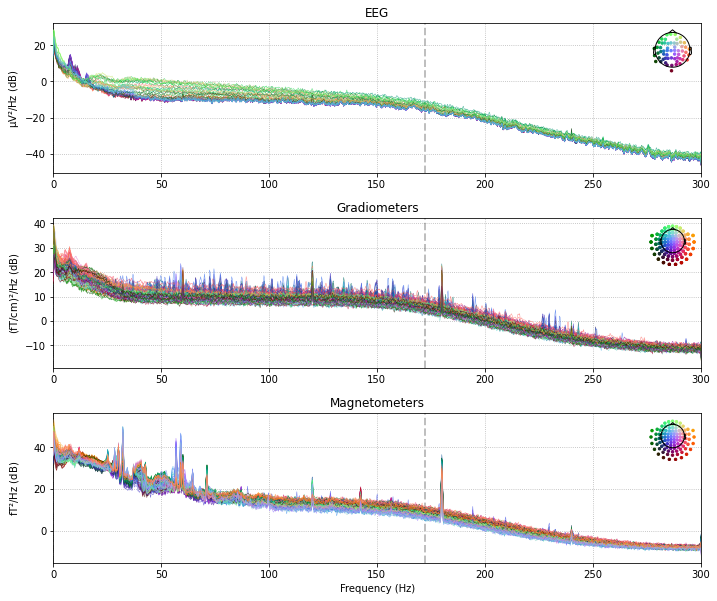

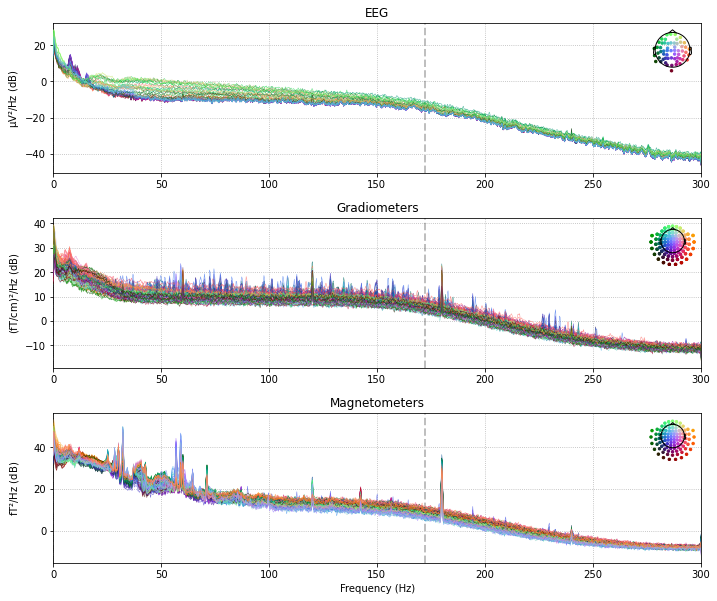

In [ ]:
raw.plot_psd()

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


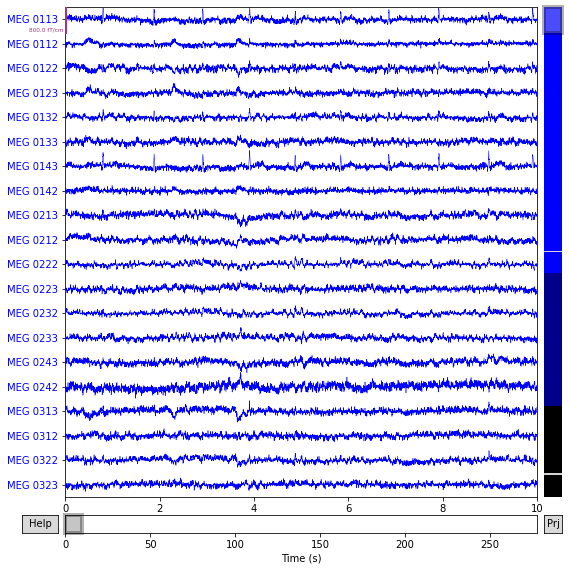

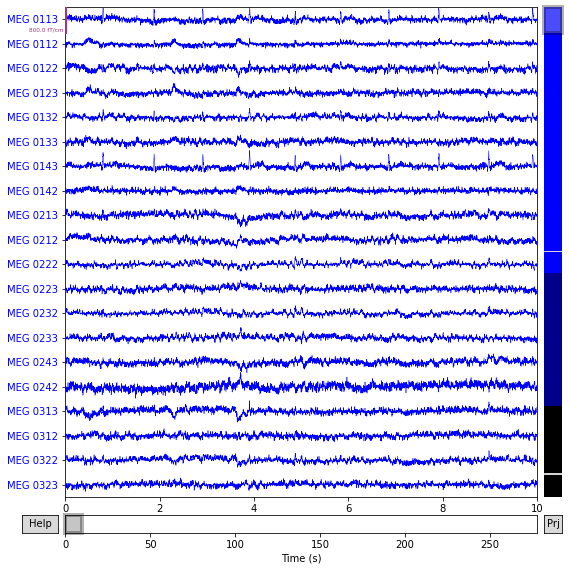

In [ ]:
raw.plot()

#Remove Noise

As we saw in the plots, EEG signals are significantly affected by eye movements and blinks which are represented by the EOG signal. Fortunalty, MNE implemented ICA algorithm that process any group of signals and extract the source signal components from them. We will apply this algorithm to extract the component that has caused the eye blink artifact to the EEG signal then we will inverse transform the components back to the original format without the eyeblink component. 

This method is successful when you only have a big number of signals. The more the signals, the accurate the components are. That's why it's very suitable for this dataset

In [ ]:
filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)
ica = ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(filt_raw)

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1983 samples (3.302 sec)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 21.7s.


<ICA | raw data decomposition, method: fastica (fit in 46 iterations on 166800 samples), 15 ICA components explaining 61.7 % of variance (364 PCA components available), channel types: mag, grad, eeg, no sources marked for exclusion>

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Creating RawArray with float64 data, n_channels=16, n_times=166800
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


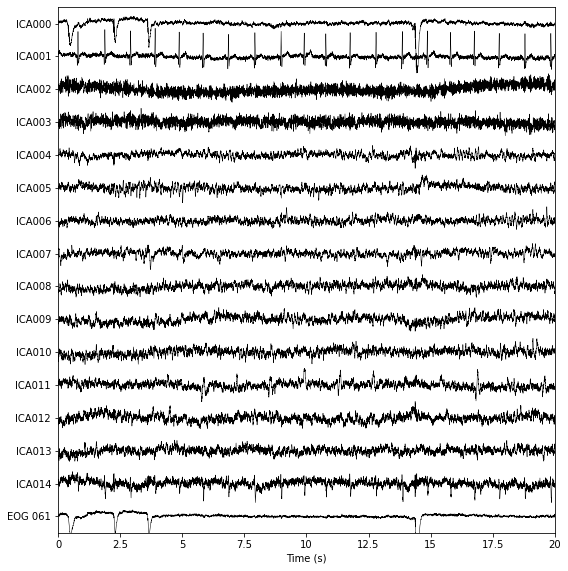

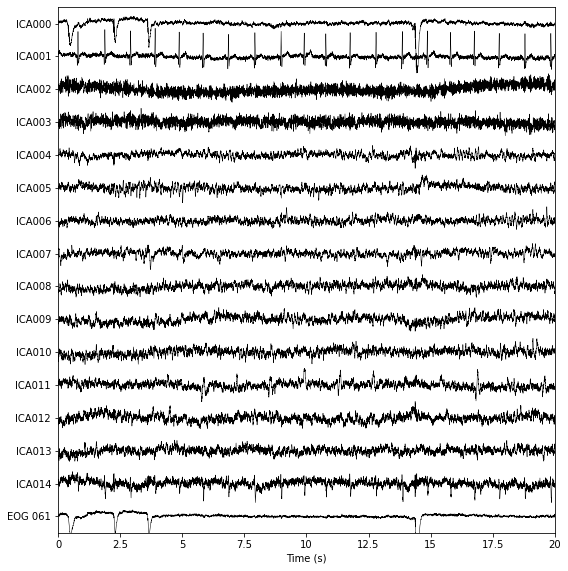

In [ ]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

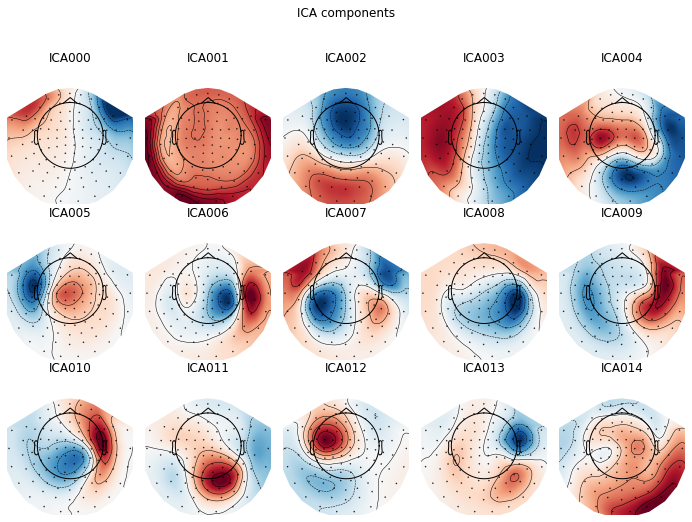

[<MNEFigure size 702x526.68 with 15 Axes>]

In [ ]:
ica.plot_components()

Using EOG channel: EOG 061
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 

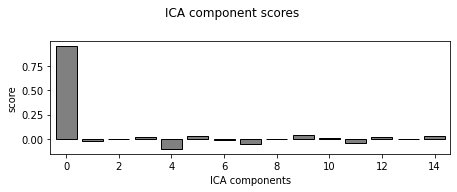

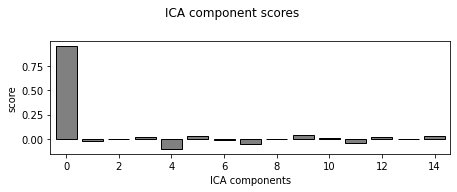

In [ ]:
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.plot_scores(eog_scores)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 364 PCA components


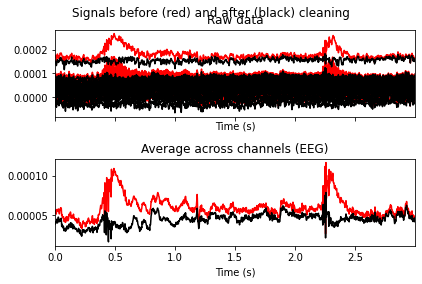

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 364 PCA components


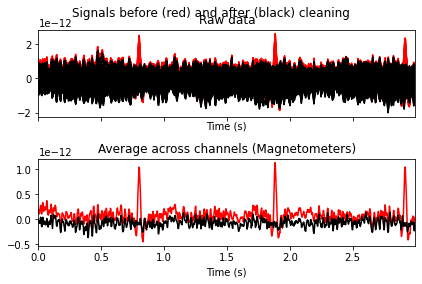

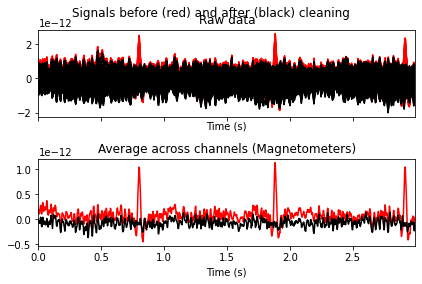

In [ ]:
# blinks
ica.plot_overlay(raw, exclude=[0], picks='eeg')
# heartbeats
ica.plot_overlay(raw, exclude=[1], picks='mag')

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


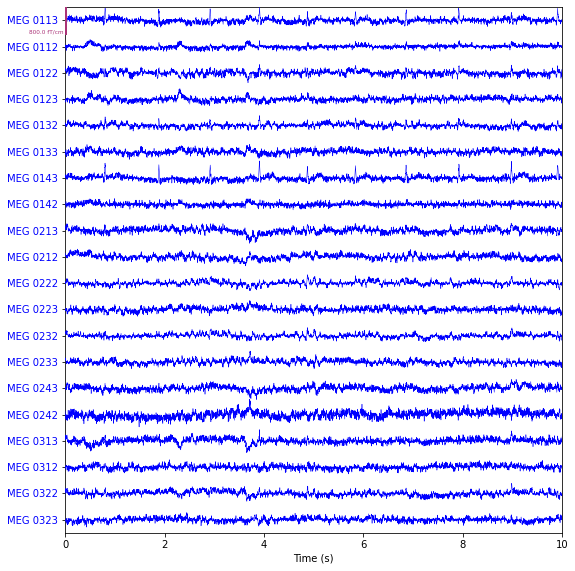

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


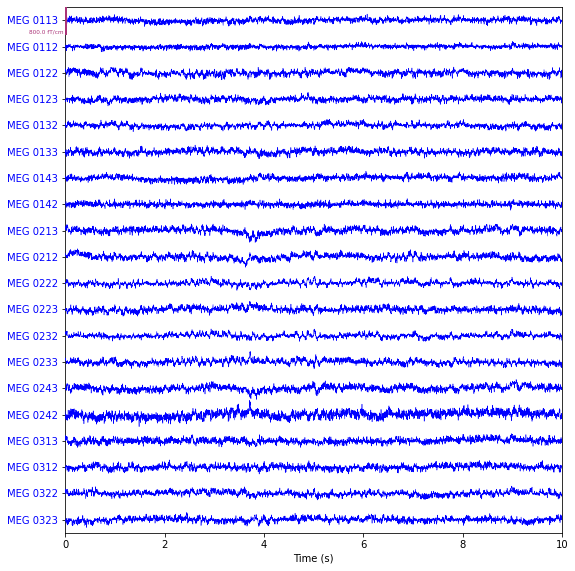

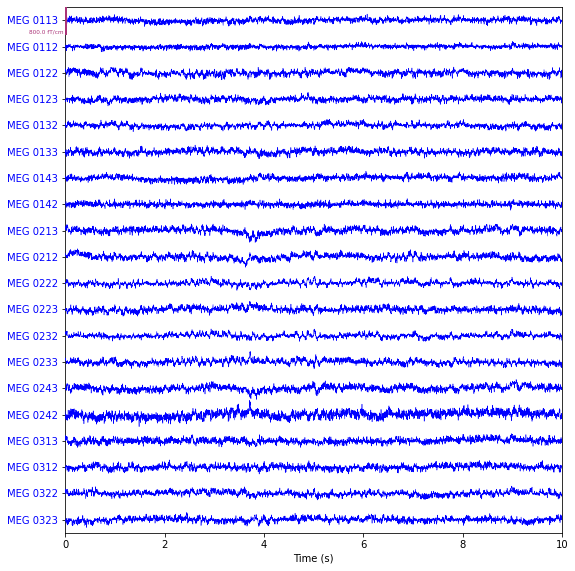

In [ ]:
ica.exclude = [0, 1]
reconst_raw = raw.copy()
ica.apply(reconst_raw)

raw.plot(show_scrollbars=False)
reconst_raw.plot(show_scrollbars=False)

##Annotations

For the rest of the labe, we will now use a simpler dataset that measures the sleep state for different individuals. In the loading of the dataset, you specify the individuals and then their data will be loaded

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data

Using default location ~/mne_data for PHYSIONET_SLEEP...


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


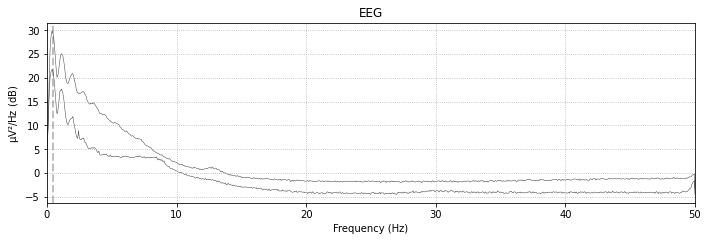

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


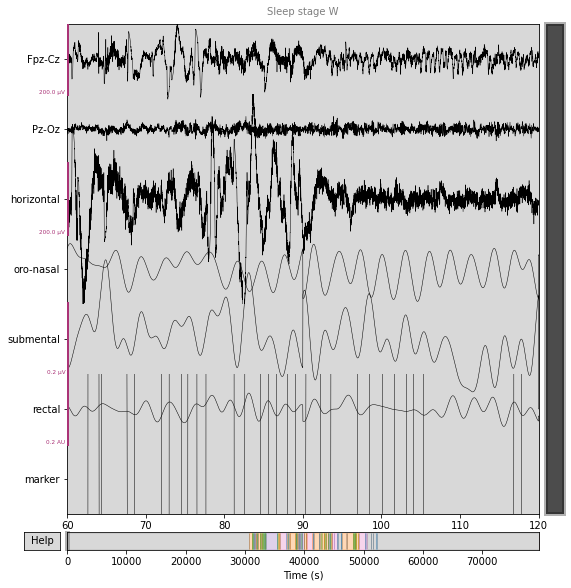

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


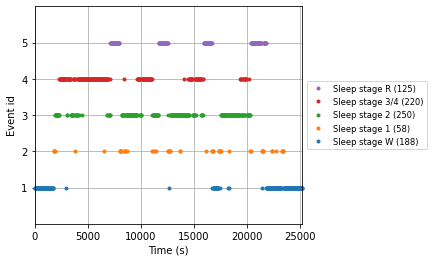

Not setting metadata
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  841 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 58
 'Sleep stage 2': 250
 'Sleep stage 3/4': 220
 'Sleep stage R': 125
 'Sleep stage W': 188>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


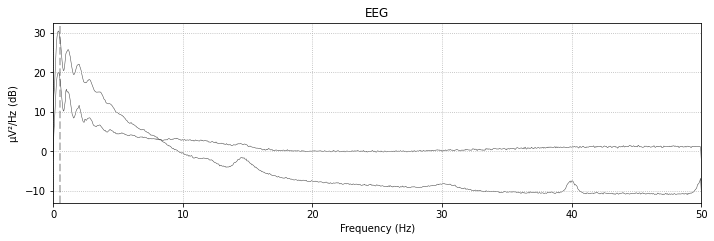

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


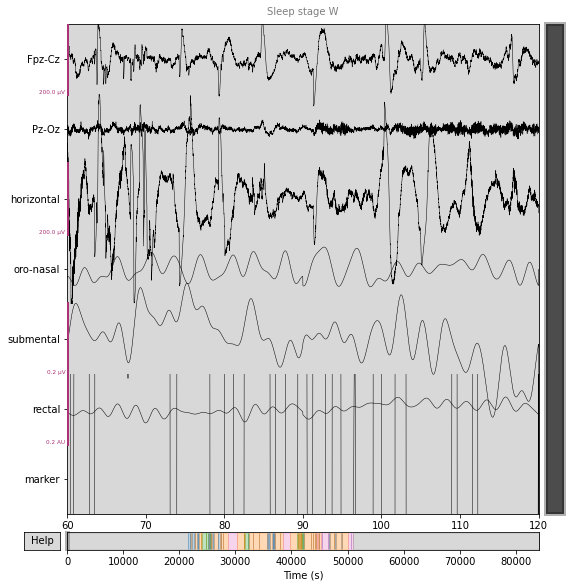

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


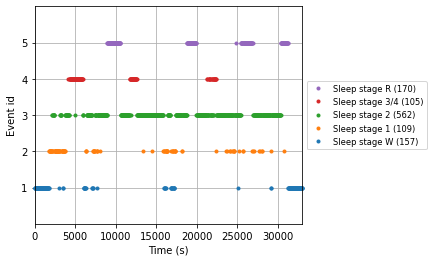

Not setting metadata
Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1103 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 109
 'Sleep stage 2': 562
 'Sleep stage 3/4': 105
 'Sleep stage R': 170
 'Sleep stage W': 157>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


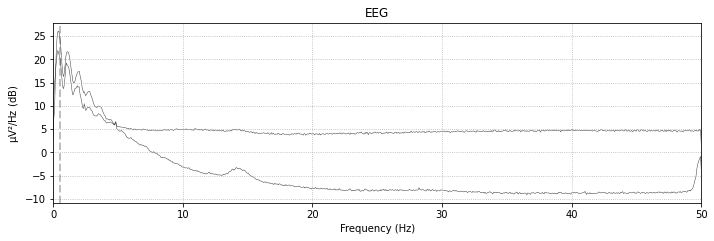

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


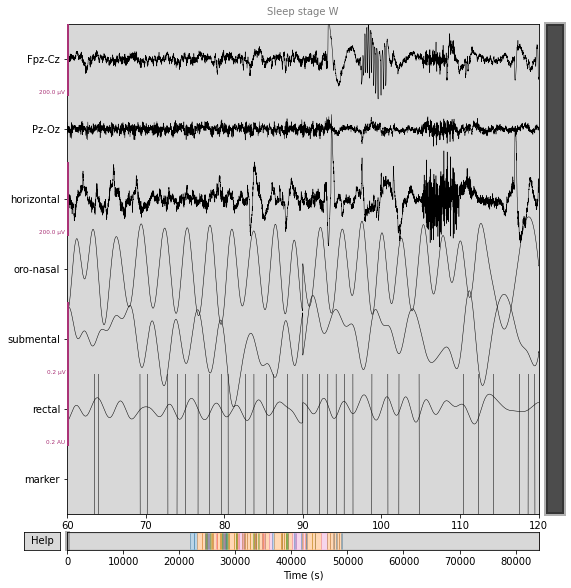

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


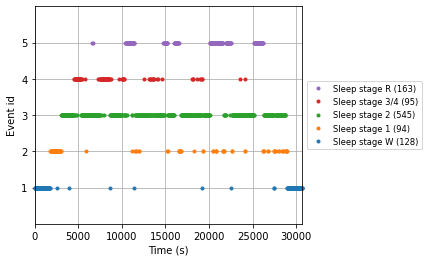

Not setting metadata
Not setting metadata
1025 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1025 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 94
 'Sleep stage 2': 545
 'Sleep stage 3/4': 95
 'Sleep stage R': 163
 'Sleep stage W': 128>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4031E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


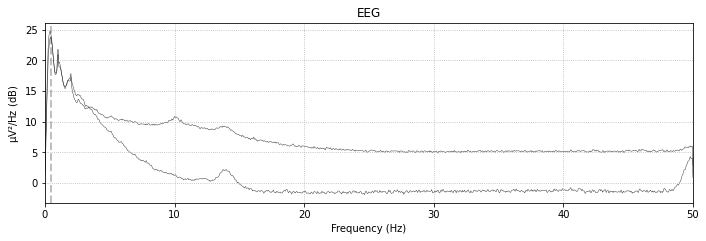

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


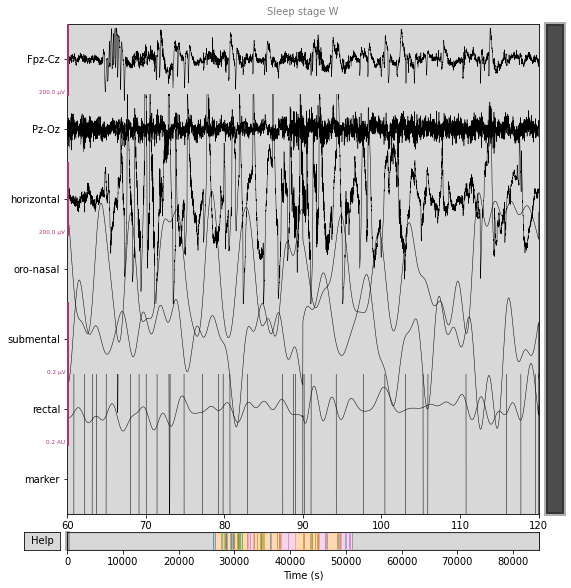

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


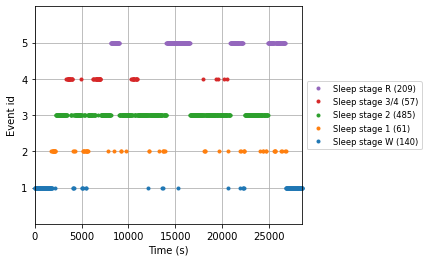

Not setting metadata
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  952 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 61
 'Sleep stage 2': 485
 'Sleep stage 3/4': 57
 'Sleep stage R': 209
 'Sleep stage W': 140>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4041E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


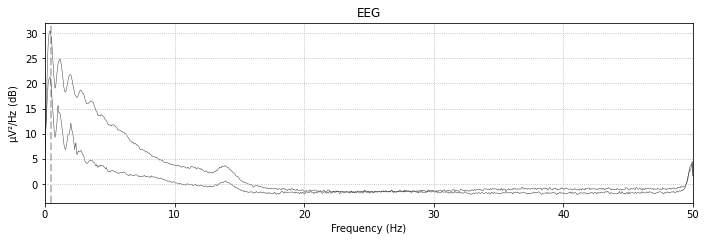

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


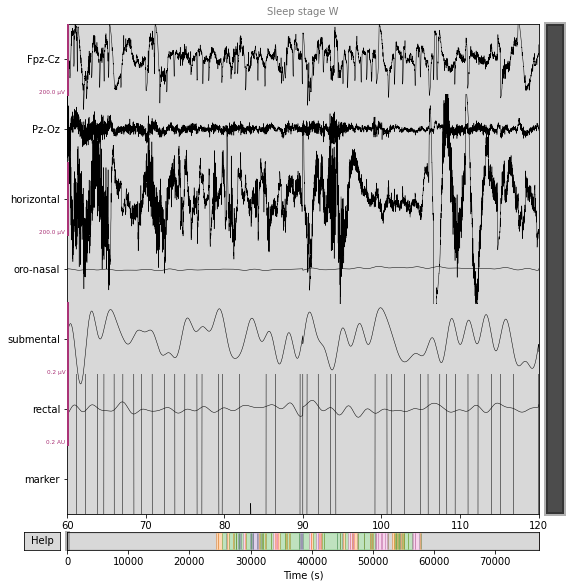

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']


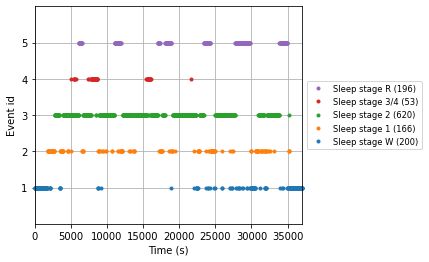

Not setting metadata
Not setting metadata
1235 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1235 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 166
 'Sleep stage 2': 620
 'Sleep stage 3/4': 53
 'Sleep stage R': 196
 'Sleep stage W': 200>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4051E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


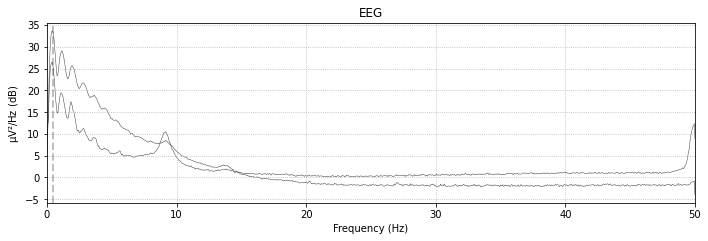

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


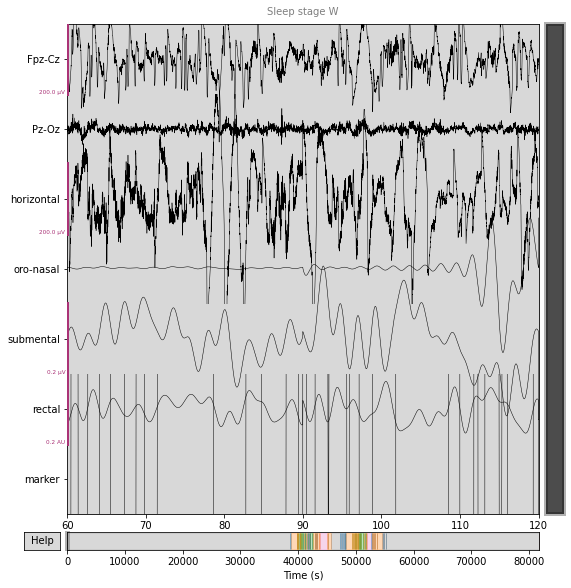

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


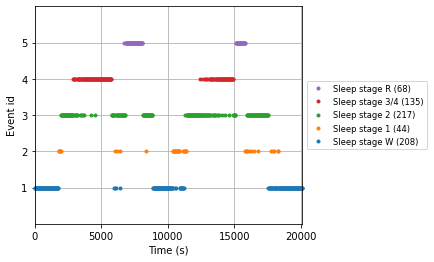

Not setting metadata
Not setting metadata
672 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  672 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 44
 'Sleep stage 2': 217
 'Sleep stage 3/4': 135
 'Sleep stage R': 68
 'Sleep stage W': 208>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4061E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


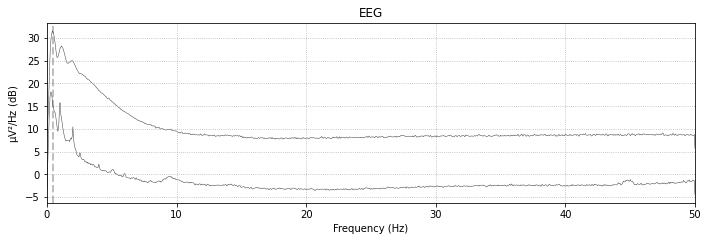

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


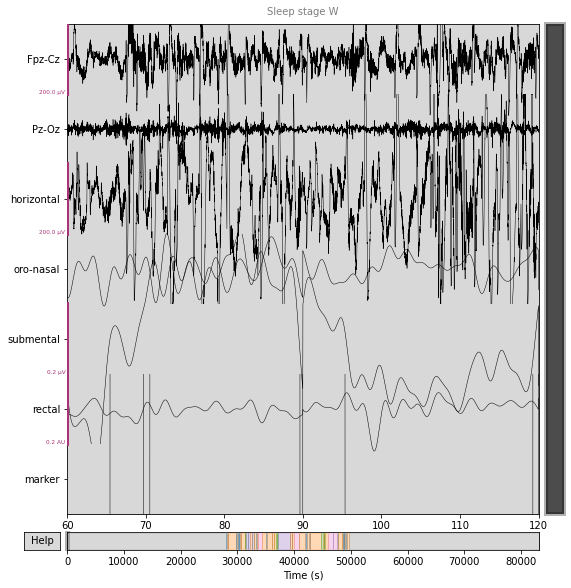

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


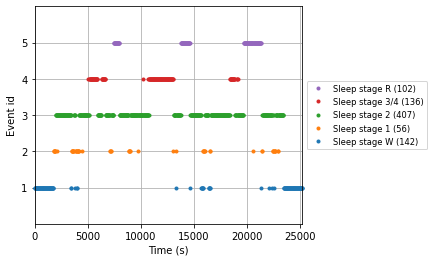

Not setting metadata
Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  843 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 56
 'Sleep stage 2': 407
 'Sleep stage 3/4': 136
 'Sleep stage R': 102
 'Sleep stage W': 142>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4071E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


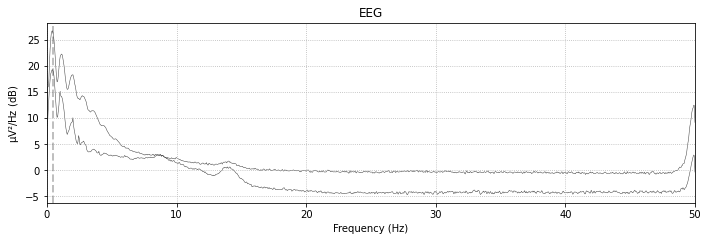

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


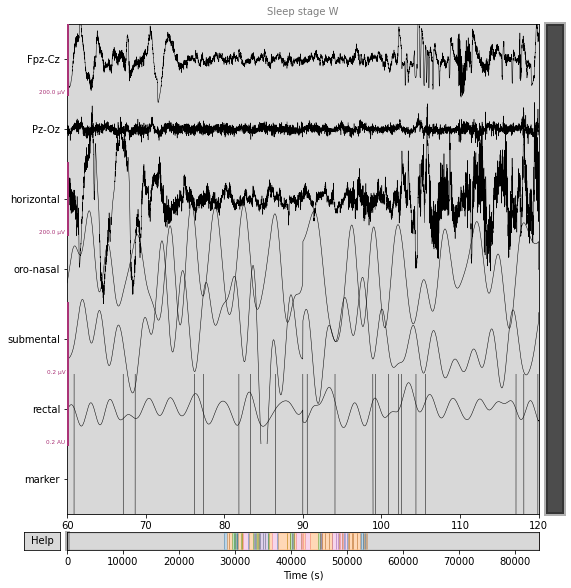

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


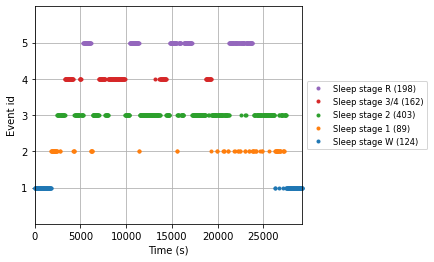

Not setting metadata
Not setting metadata
976 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  976 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 89
 'Sleep stage 2': 403
 'Sleep stage 3/4': 162
 'Sleep stage R': 198
 'Sleep stage W': 124>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4081E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


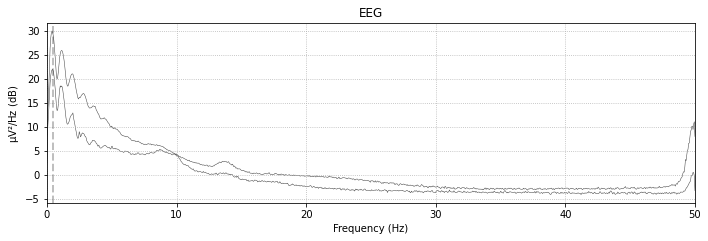

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


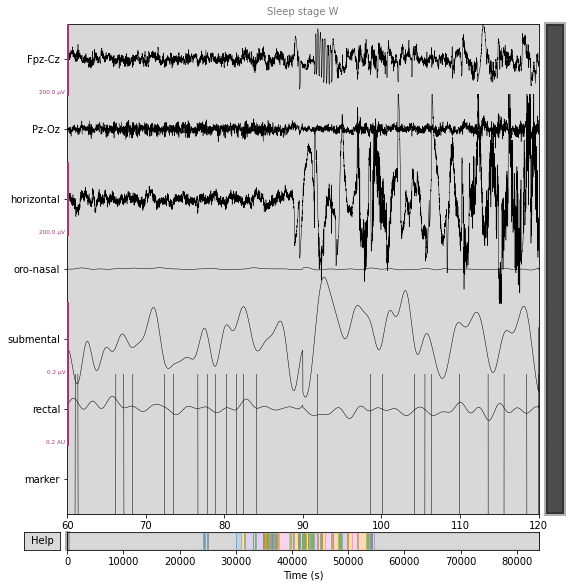

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


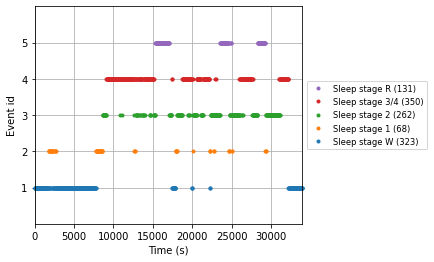

Not setting metadata
Not setting metadata
1134 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1134 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 68
 'Sleep stage 2': 262
 'Sleep stage 3/4': 350
 'Sleep stage R': 131
 'Sleep stage W': 323>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4091E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


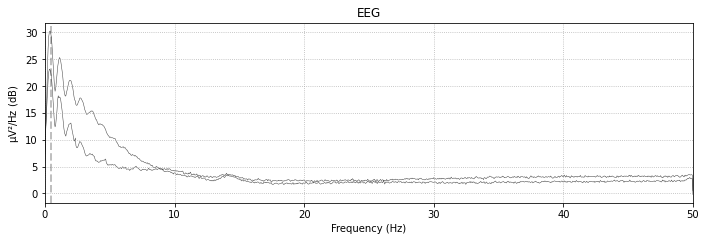

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


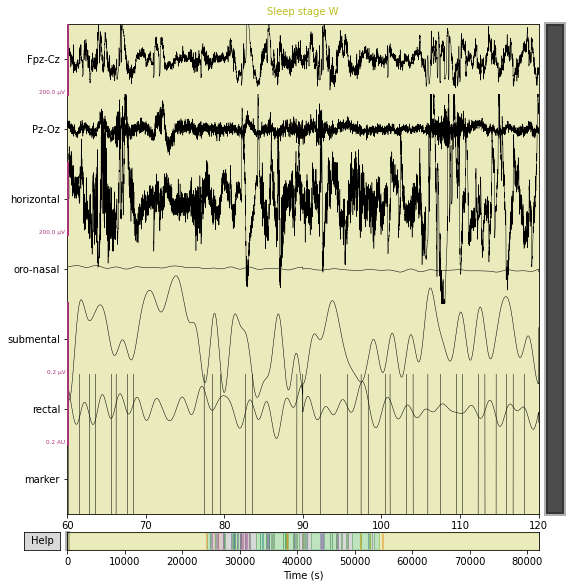

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


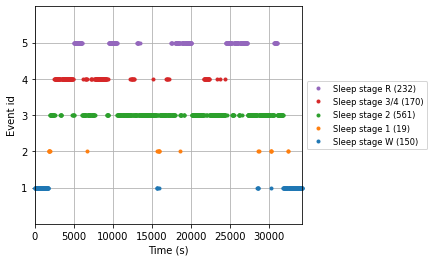

Not setting metadata
Not setting metadata
1132 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1132 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 19
 'Sleep stage 2': 561
 'Sleep stage 3/4': 170
 'Sleep stage R': 232
 'Sleep stage W': 150>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4101E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


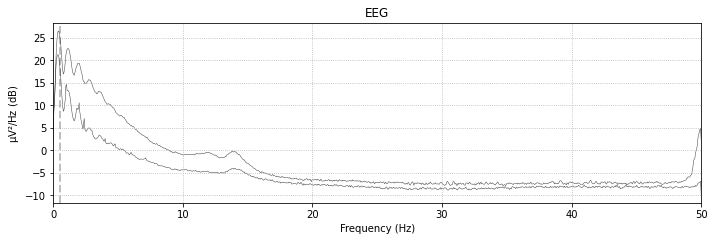

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


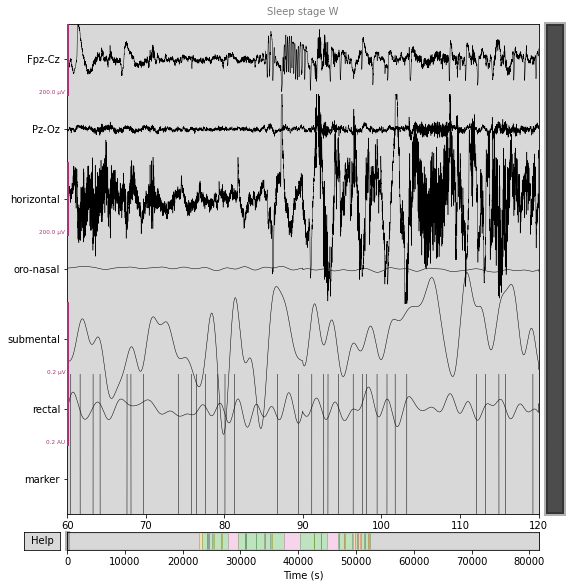

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']


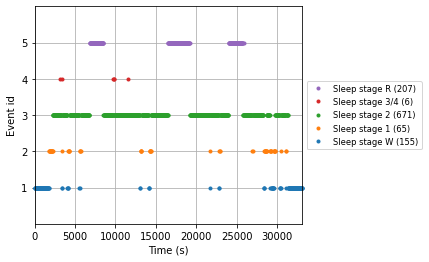

Not setting metadata
Not setting metadata
1104 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1104 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 65
 'Sleep stage 2': 671
 'Sleep stage 3/4': 6
 'Sleep stage R': 207
 'Sleep stage W': 155>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4111E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


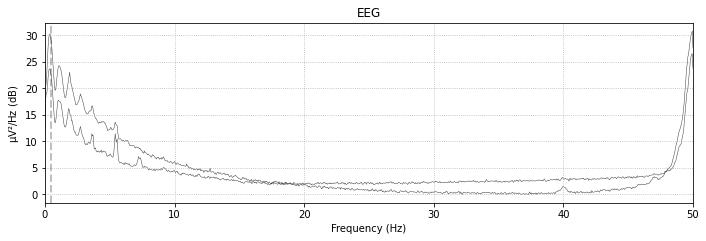

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


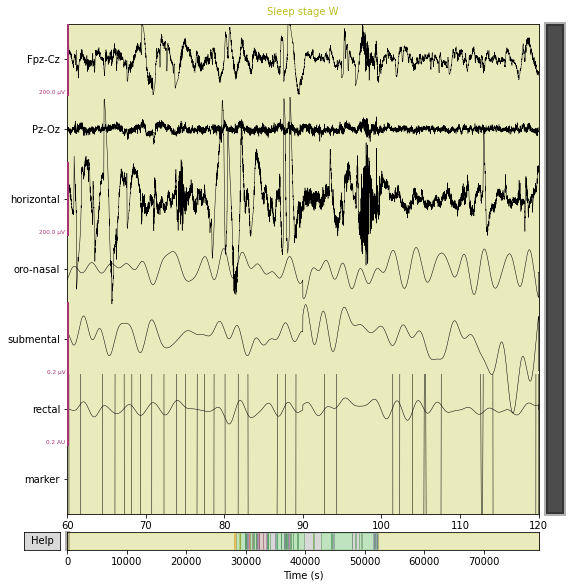

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


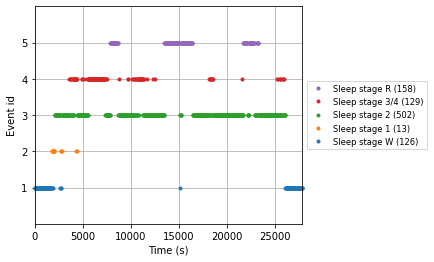

Not setting metadata
Not setting metadata
928 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  928 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 13
 'Sleep stage 2': 502
 'Sleep stage 3/4': 129
 'Sleep stage R': 158
 'Sleep stage W': 126>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4121E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


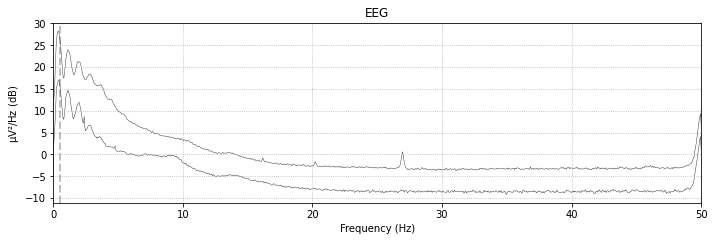

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


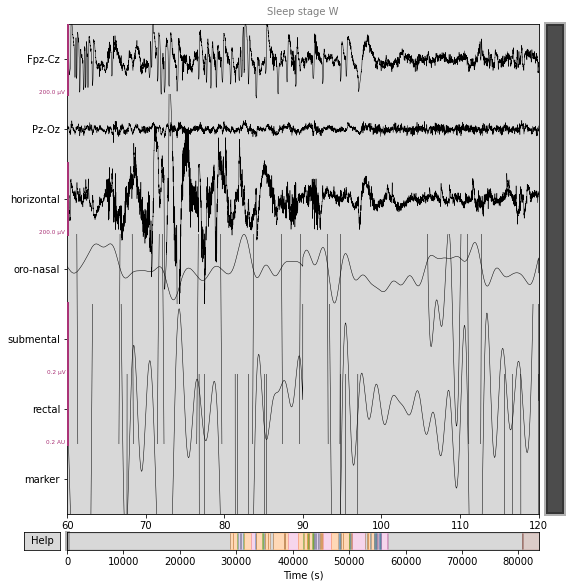

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


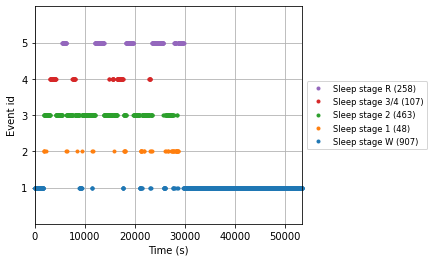

Not setting metadata
Not setting metadata
1783 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1783 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 48
 'Sleep stage 2': 463
 'Sleep stage 3/4': 107
 'Sleep stage R': 258
 'Sleep stage W': 907>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4131E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


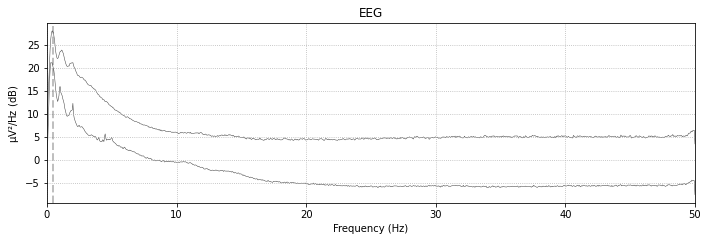

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


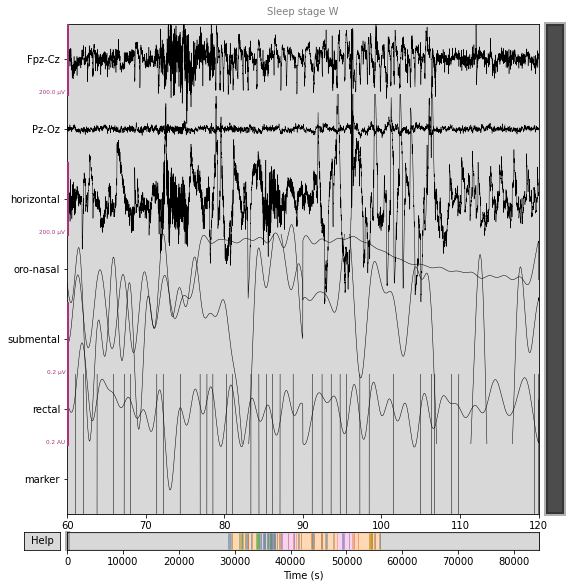

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


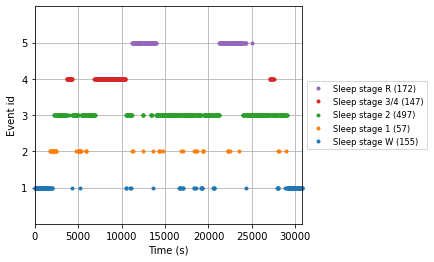

Not setting metadata
Not setting metadata
1028 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1028 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 57
 'Sleep stage 2': 497
 'Sleep stage 3/4': 147
 'Sleep stage R': 172
 'Sleep stage W': 155>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4141E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


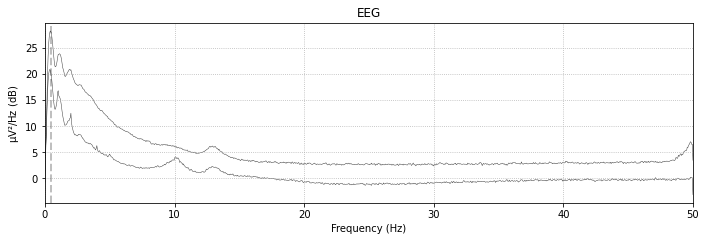

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


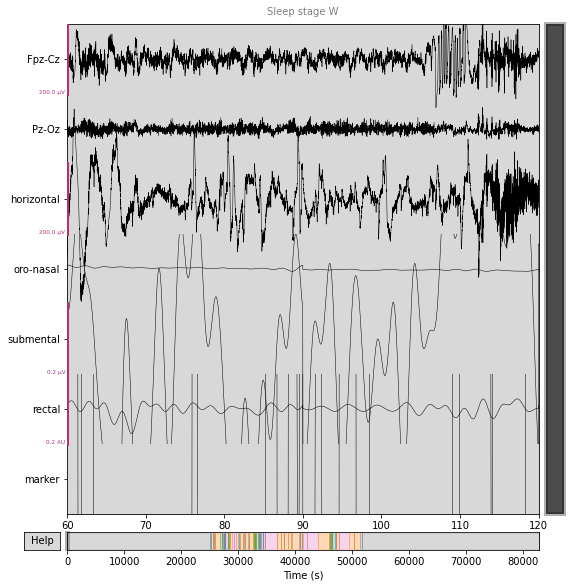

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


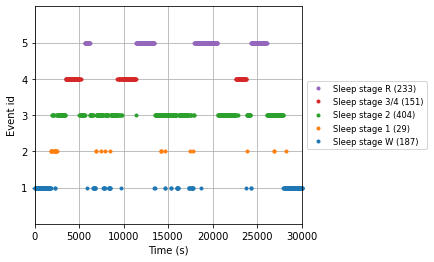

Not setting metadata
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1004 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 29
 'Sleep stage 2': 404
 'Sleep stage 3/4': 151
 'Sleep stage R': 233
 'Sleep stage W': 187>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4151E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
sample rate: 100.0 Hz
Effective window size : 20.480 (s)


<ipython-input-18-b0f21de8148e>:39: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


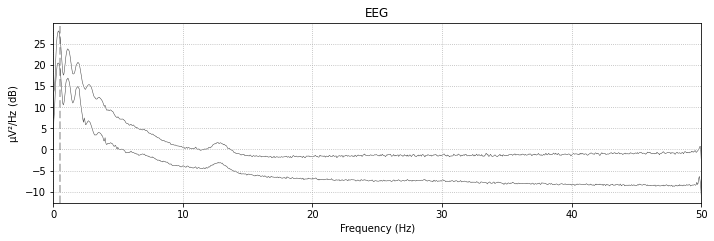

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


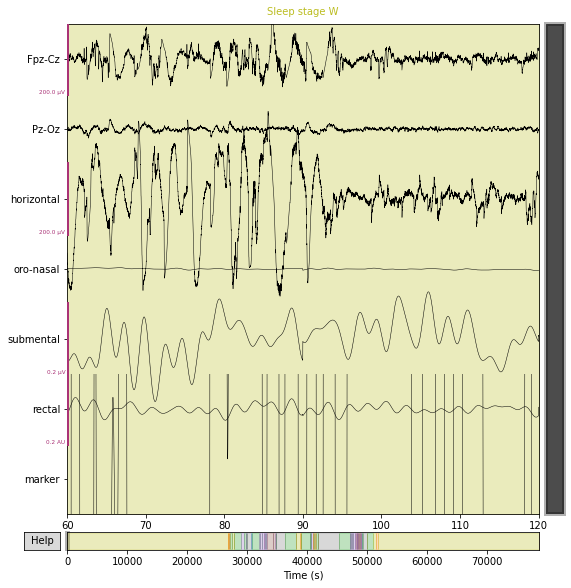

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


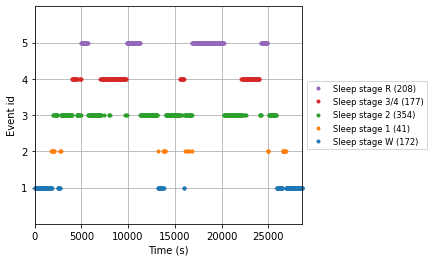

Not setting metadata
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  952 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 41
 'Sleep stage 2': 354
 'Sleep stage 3/4': 177
 'Sleep stage R': 208
 'Sleep stage W': 172>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

from mne.datasets.sleep_physionet.age import fetch_data

# ALICE = 1

alice_files = fetch_data(subjects=range(0, 21), recording=[1])

mapping = {'rectal': 'misc',
           'marker': 'misc'}

annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage 1': 2,
                              'Sleep stage 2': 3,
                              'Sleep stage 3': 4,
                              'Sleep stage 4': 4,
                              'Sleep stage R': 5}

# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}                              
# raw_train = mne.io.read_raw_edf(alice_files[1][0])
raw_train=[]
for i in range(0,16):
  raw = mne.io.read_raw_edf(alice_files[i][0])
  print('sample rate:', raw.info['sfreq'], 'Hz')
  annot_train = mne.read_annotations(alice_files[i][1])
  raw.set_annotations(annot_train, emit_warning=False)
  raw.set_channel_types(mapping)
  set(raw.get_channel_types())
  set(raw.annotations.description)
  raw.get_data().shape[1]/raw.info['sfreq']/60/60
  set(raw.ch_names)
  raw.plot_psd()
  # plot some data
  # scalings were chosen manually to allow for simultaneous visualization of
  # different channel types in this specific dataset
  raw.plot(start=60, duration=60,
                scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
                              misc=1e-1))

  # keep last 30-min wake events before sleep and first 30-min wake events after
  # sleep and redefine annotations on raw data
  annot_train.crop(annot_train[1]['onset'] - 30 * 60,
                  annot_train[-2]['onset'] + 30 * 60)
  raw.set_annotations(annot_train, emit_warning=False)

  events_train, _ = mne.events_from_annotations(
      raw, event_id=annotation_desc_2_event_id, chunk_duration=30.)

  # plot events
  fig = mne.viz.plot_events(events_train, event_id=event_id,
                            sfreq=raw.info['sfreq'],
                            first_samp=events_train[0, 0])
  tmax = 30. - 1. / raw.info['sfreq']
  reject_criteria = dict(
                        eeg=150e-6,       # 150 µV
                        eog=250e-6)       # 250 µV
  epochs_train = mne.Epochs(raw=raw, events=events_train,
                            event_id=event_id, tmin=0., tmax=tmax, baseline=None, reject=reject_criteria)

  print(epochs_train)
  raw_train.append(epochs_train)


In [ ]:
epochs_total_train = mne.concatenate_epochs(epochs_list=raw_train)

Streaming output truncated to the last 5000 lines.
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EEG : ['Fpz-Cz']
    Rejecting  epoch based on EEG :

In [ ]:
epochs_total_train.get_data().shape

(8111, 7, 3000)

test


Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4161E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
Effective window size : 20.480 (s)


<ipython-input-21-7e1c6d0473f8>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


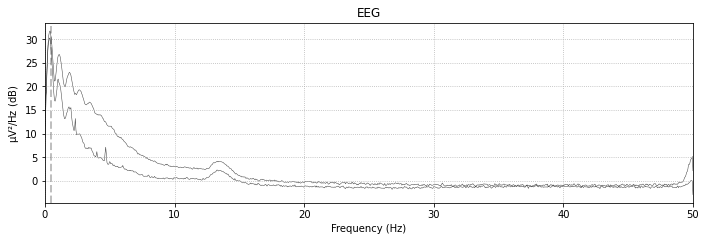

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


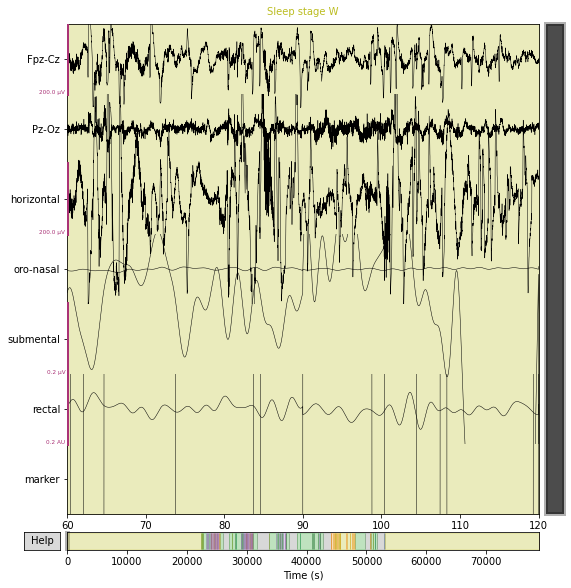

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


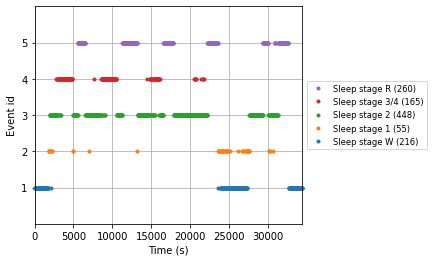

Not setting metadata
Not setting metadata
1144 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1144 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 55
 'Sleep stage 2': 448
 'Sleep stage 3/4': 165
 'Sleep stage R': 260
 'Sleep stage W': 216>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4171E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
Effective window size : 20.480 (s)


<ipython-input-21-7e1c6d0473f8>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


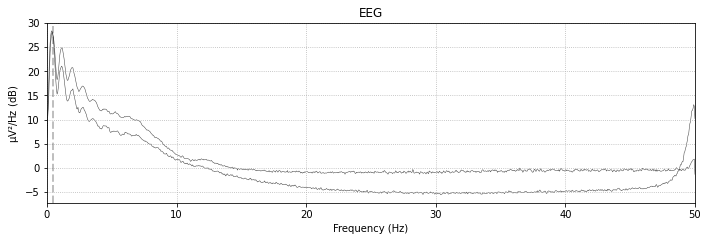

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


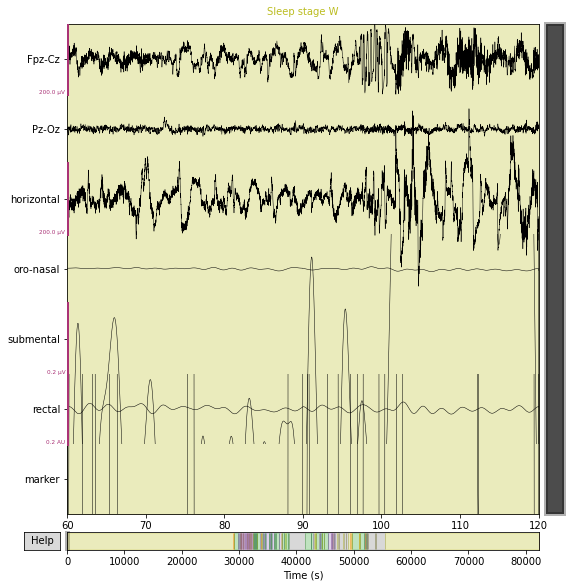

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


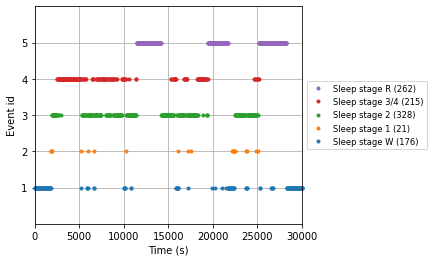

Not setting metadata
Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1002 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 21
 'Sleep stage 2': 328
 'Sleep stage 3/4': 215
 'Sleep stage R': 262
 'Sleep stage W': 176>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4181E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
Effective window size : 20.480 (s)


<ipython-input-21-7e1c6d0473f8>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


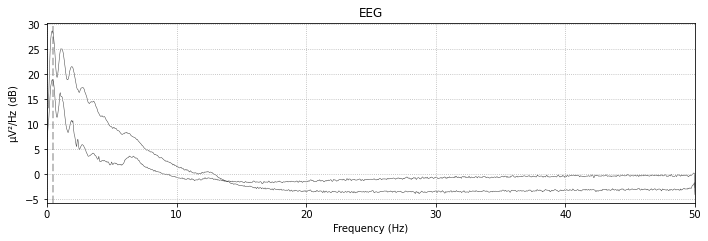

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


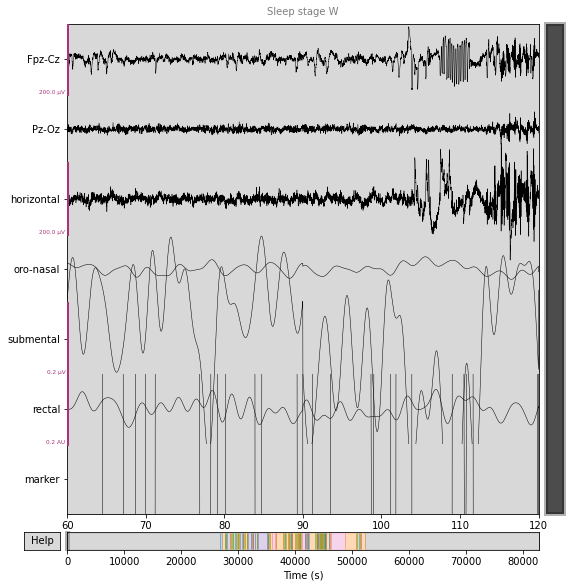

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


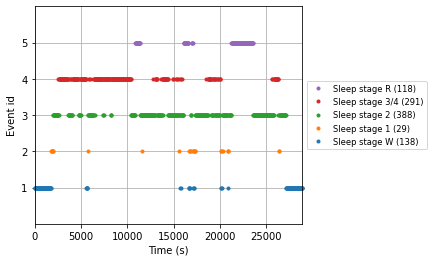

Not setting metadata
Not setting metadata
964 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  964 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 29
 'Sleep stage 2': 388
 'Sleep stage 3/4': 291
 'Sleep stage R': 118
 'Sleep stage W': 138>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4191E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
Effective window size : 20.480 (s)


<ipython-input-21-7e1c6d0473f8>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


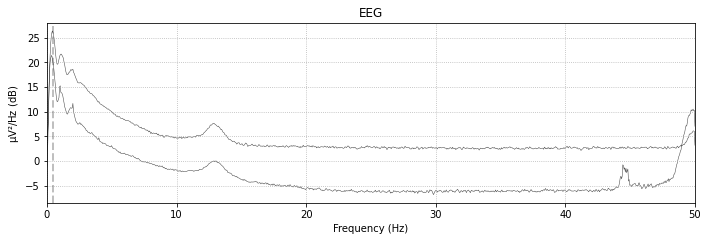

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


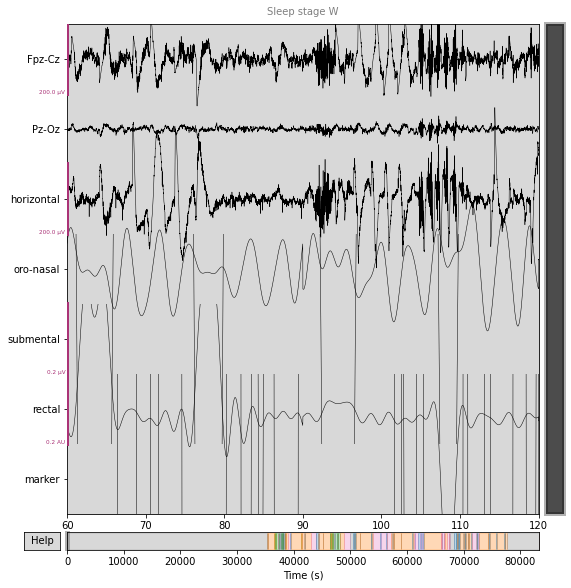

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


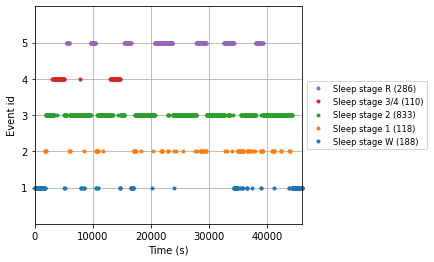

Not setting metadata
Not setting metadata
1535 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1535 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 118
 'Sleep stage 2': 833
 'Sleep stage 3/4': 110
 'Sleep stage R': 286
 'Sleep stage W': 188>
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4201E0-PSG.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
rectal, marker
Creating raw.info structure...
Effective window size : 20.480 (s)


<ipython-input-21-7e1c6d0473f8>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


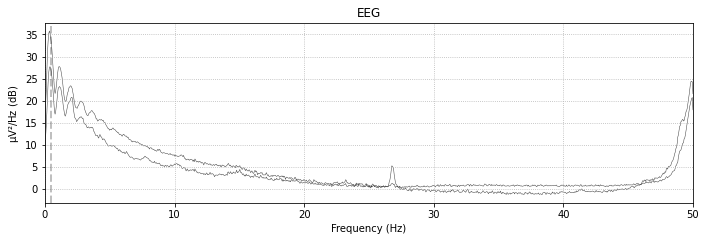

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


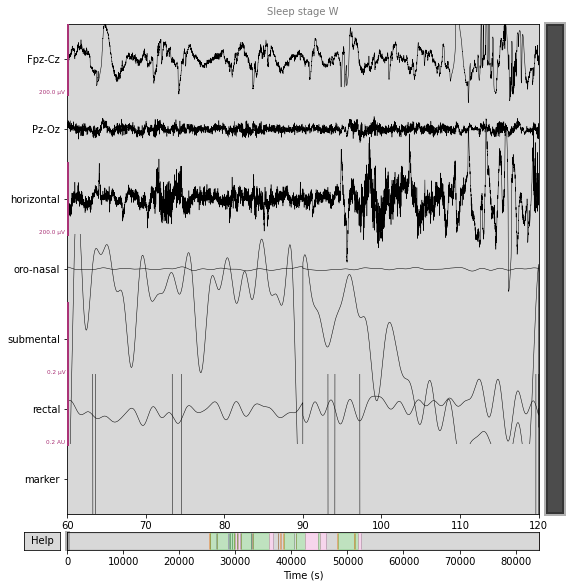

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']


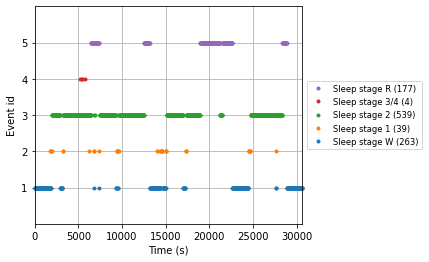

Not setting metadata
Not setting metadata
1022 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1022 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 39
 'Sleep stage 2': 539
 'Sleep stage 3/4': 4
 'Sleep stage R': 177
 'Sleep stage W': 263>


In [ ]:
raw_test=[]
for i in range(16,21):
  raw = mne.io.read_raw_edf(alice_files[i][0])
  annot_test = mne.read_annotations(alice_files[i][1])
  raw.set_annotations(annot_test, emit_warning=False)
  raw.set_channel_types(mapping)
  set(raw.get_channel_types())
  set(raw.annotations.description)
  raw.get_data().shape[1]/raw.info['sfreq']/60/60
  set(raw.ch_names)
  raw.plot_psd()
  # plot some data
  # scalings were chosen manually to allow for simultaneous visualization of
  # different channel types in this specific dataset
  raw.plot(start=60, duration=60,
                scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
                              misc=1e-1))

  # keep last 30-min wake events before sleep and first 30-min wake events after
  # sleep and redefine annotations on raw data
  annot_test.crop(annot_test[1]['onset'] - 30 * 60,
                  annot_test[-2]['onset'] + 30 * 60)
  raw.set_annotations(annot_test, emit_warning=False)

  events_test, _ = mne.events_from_annotations(
      raw, event_id=annotation_desc_2_event_id, chunk_duration=30.)

  # plot events
  fig = mne.viz.plot_events(events_test, event_id=event_id,
                            sfreq=raw.info['sfreq'],
                            first_samp=events_test[0, 0])
  tmax = 30. - 1. / raw.info['sfreq']
  reject_criteria = dict(
                        eeg=150e-6,       # 150 µV
                        eog=250e-6)       # 250 µV
  epochs_test = mne.Epochs(raw=raw, events=events_test,
                            event_id=event_id, tmin=0., tmax=tmax, baseline=None, reject=reject_criteria)

  print(epochs_test)
  raw_test.append(epochs_test)

In [ ]:
epochs_total_test = mne.concatenate_epochs(epochs_list=raw_test)

Loading data for 1144 events and 3000 original time points ...
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EOG : ['horizontal']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based on EEG : ['Fpz-Cz', 'Pz-Oz']
    Rejecting  epoch based

#Task

---



The steps to classify any signals dataset are as follows:- 
1. Preprocess signals 
2. Divide data into epochs of equal sizes
3. Feature Engineering on the epochs
4. Train Classification Model 


**Features That Can We Use:**

---


['app_entropy', 'decorr_time', 'energy_freq_bands', '**higuchi_fd**', 'hjorth_complexity', 'hjorth_complexity_spect', 'hjorth_mobility', 'hjorth_mobility_spect', 'hurst_exp', 'katz_fd', 'kurtosis', 'line_length', 'mean', 'pow_freq_bands', '**ptp_amp**', 'samp_entropy', 'skewness', 'spect_edge_freq', '**spect_entropy**', 'spect_slope', '**std**', 'svd_entropy', 'svd_fisher_info', 'teager_kaiser_energy', 'variance', 'wavelet_coef_energy', 'zero_crossings', 'max_cross_corr', 'nonlin_interdep', 'phase_lock_val', 'spect_corr', 'time_corr']

# **First Feature is Standard Daviation:**


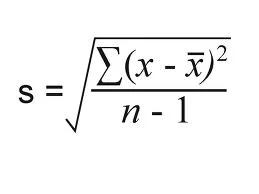

In [ ]:
x = epochs_total_train.get_data()[:,:2,:]
y = epochs_total_train.events[:,2]

standardFeatureVector = np.std(x, axis=2)
standardFeatureVector.shape

(8111, 2)

Sleep stage 1
(598, 2)
Sleep stage 2
(5256, 2)
Sleep stage 3/4
(423, 2)
Sleep stage R
(1466, 2)
Sleep stage W
(368, 2)


Text(0, 0.5, 'Density')

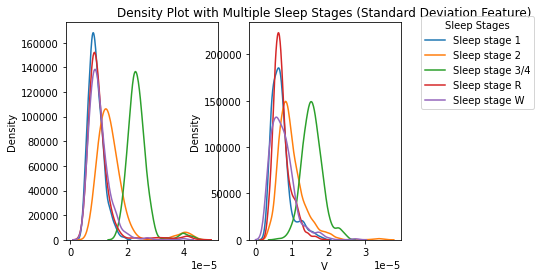

In [ ]:
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
  print(stage)
  f = standardFeatureVector[y==event_id[stage]]
  print(f.shape)
  sns.kdeplot(f[:,0], label = stage, ax=ax1)
  sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages (Standard Deviation Feature)')
plt.xlabel('V')
plt.ylabel('Density')


# **Second Feature is Higuchi Fractal Dimension**



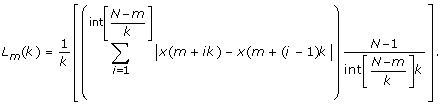

In [ ]:
import mne_features
from mne_features.feature_extraction import extract_features
selected_funcs = {'higuchi_fd'}

higuchi_fdFeatureVector = extract_features(epochs_total_train.get_data(),raw.info['sfreq'],selected_funcs)
higuchi_fdFeatureVector.shape

(8111, 7)

Sleep stage 1
(598, 2)
Sleep stage 2
(5256, 2)
Sleep stage 3/4
(423, 2)
Sleep stage R
(1466, 2)
Sleep stage W
(368, 2)


Text(0, 0.5, 'Density')

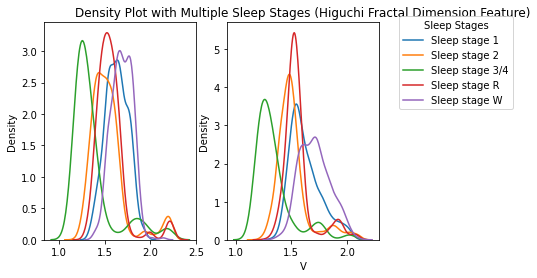

In [ ]:
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
  print(stage)
  f = higuchi_fdFeatureVector[:,:2][y==event_id[stage]]
  print(f.shape)
  sns.kdeplot(f[:,0], label = stage, ax=ax1)
  sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages (Higuchi Fractal Dimension Feature)')
plt.xlabel('V')
plt.ylabel('Density')


# **Third Feature is Point To Point amp**






In [ ]:
import mne_features
selected_funcs = {'ptp_amp'}
ptp_ampFeatureVector = mne_features.feature_extraction.extract_features(epochs_total_train.get_data(), raw.info['sfreq'], selected_funcs)
ptp_ampFeatureVector.shape

(8111, 7)

Sleep stage 1
(598, 2)
Sleep stage 2
(5256, 2)
Sleep stage 3/4
(423, 2)
Sleep stage R
(1466, 2)
Sleep stage W
(368, 2)


Text(0, 0.5, 'Density')

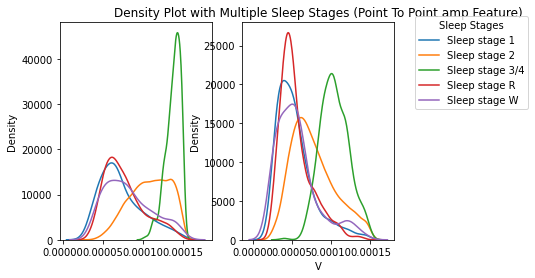

In [ ]:
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
  print(stage)
  f = ptp_ampFeatureVector[:,:2][y==event_id[stage]]
  print(f.shape)
  sns.kdeplot(f[:,0], label = stage, ax=ax1)
  sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages (Point To Point amp Feature)')
plt.xlabel('V')
plt.ylabel('Density')


# **Fourth Feature is Spectral Entropy**



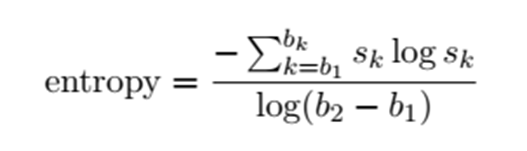

In [ ]:
import mne_features
selected_funcs = {'spect_entropy'}
spect_entropyFeatureVector = mne_features.feature_extraction.extract_features(epochs_total_train.get_data(), raw.info['sfreq'], selected_funcs)
spect_entropyFeatureVector.shape

(8111, 7)

Sleep stage 1
(598, 2)
Sleep stage 2
(5256, 2)
Sleep stage 3/4
(423, 2)
Sleep stage R
(1466, 2)
Sleep stage W
(368, 2)


Text(0, 0.5, 'Density')

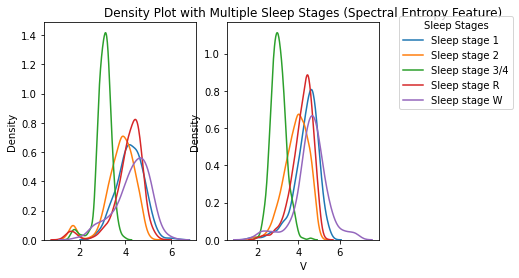

In [ ]:
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
  print(stage)
  f = spect_entropyFeatureVector[:,:2][y==event_id[stage]]
  print(f.shape)
  sns.kdeplot(f[:,0], label = stage, ax=ax1)
  sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages (Spectral Entropy Feature)')
plt.xlabel('V')
plt.ylabel('Density')

# **The Final Feature Vector**

In [ ]:
featureVector =np.c_[ standardFeatureVector, higuchi_fdFeatureVector[:,:2], ptp_ampFeatureVector[:,:2]]
featureVector.shape

(8111, 6)

In [ ]:
def extract_feature_for_model(epochs):
    selected_funcs = {'higuchi_fd', 'ptp_amp', 'std'}
    X_new = extract_features(epochs, raw.info['sfreq'], selected_funcs)

    return X_new
epochs_total_train.get_data().shape

(8111, 7, 3000)

In [ ]:
def meancalc(importance):
  higuchimean = np.mean(importance[0:7])
  ptp_ampmean = np.mean(importance[7:14])
  stdmean = np.mean(importance[14:21])
  return higuchimean,ptp_ampmean,stdmean

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from mne.time_frequency import psd_welch
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

pipe = LogisticRegression()


y_train = epochs_total_train.events[:, 2]

X_shuffled,y_shuffled = shuffle(epochs_total_train.get_data(), y_train, random_state=42)
pipe.fit(extract_feature_for_model(X_shuffled), y_shuffled)

y_pred_train = pipe.predict(extract_feature_for_model(X_shuffled))
y_pred_test = pipe.predict(extract_feature_for_model(epochs_total_test.get_data()))
y_test = epochs_total_test.events[:, 2]


acc_train = accuracy_score(y_shuffled,y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy score: {}\n".format(acc_train))
print("Test Accuracy score: {}\n".format(acc_test))


print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test, target_names=event_id.keys()))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy score: 0.6480088768339293

Test Accuracy score: 0.6605166051660517

[[   0    0  170    0    0]
 [   0    0  153    0    0]
 [   0    0 1969    0    0]
 [   0    0  177    0    0]
 [   0    0  512    0    0]]
                 precision    recall  f1-score   support

  Sleep stage W       0.00      0.00      0.00       170
  Sleep stage 1       0.00      0.00      0.00       153
  Sleep stage 2       0.66      1.00      0.80      1969
Sleep stage 3/4       0.00      0.00      0.00       177
  Sleep stage R       0.00      0.00      0.00       512

       accuracy                           0.66      2981
      macro avg       0.13      0.20      0.16      2981
   weighted avg       0.44      0.66      0.53      2981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


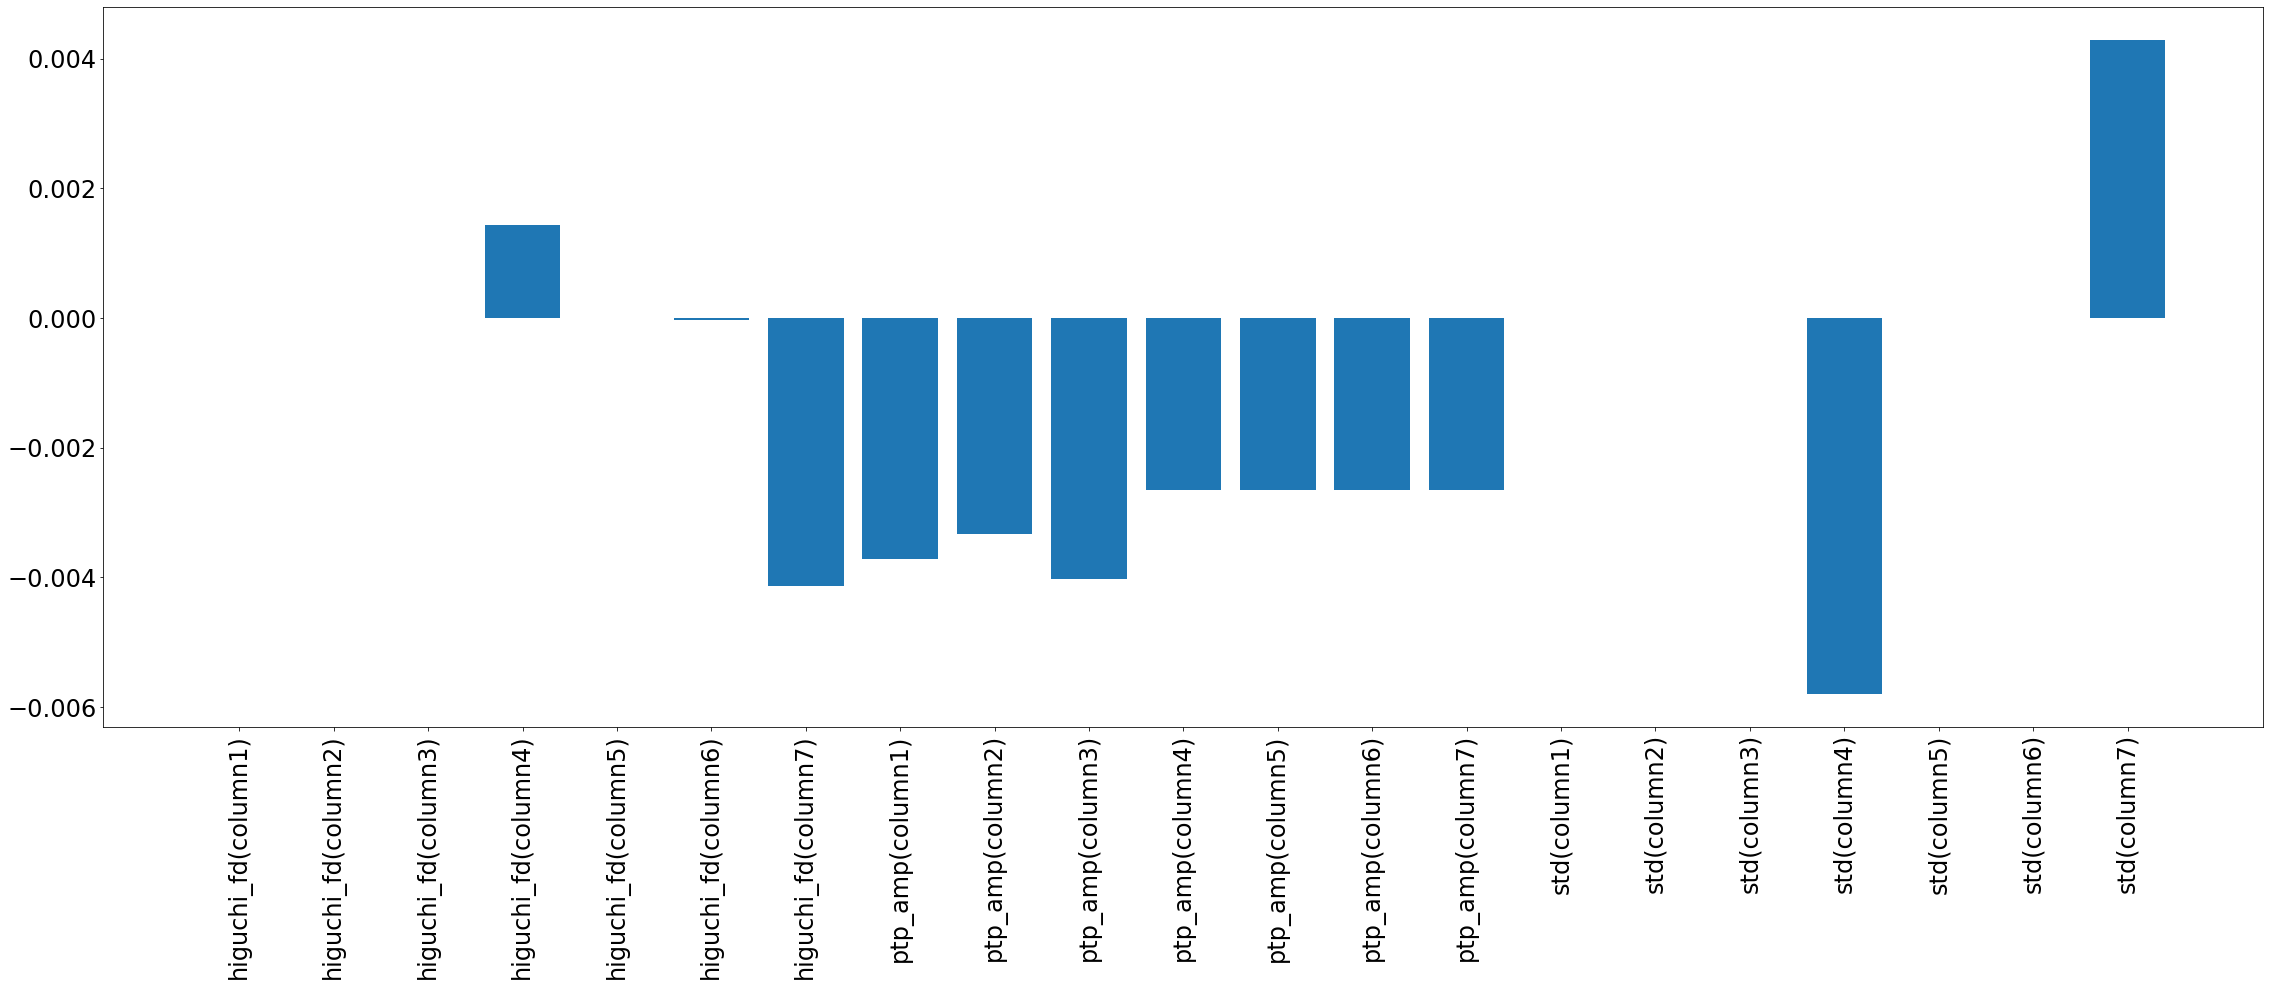

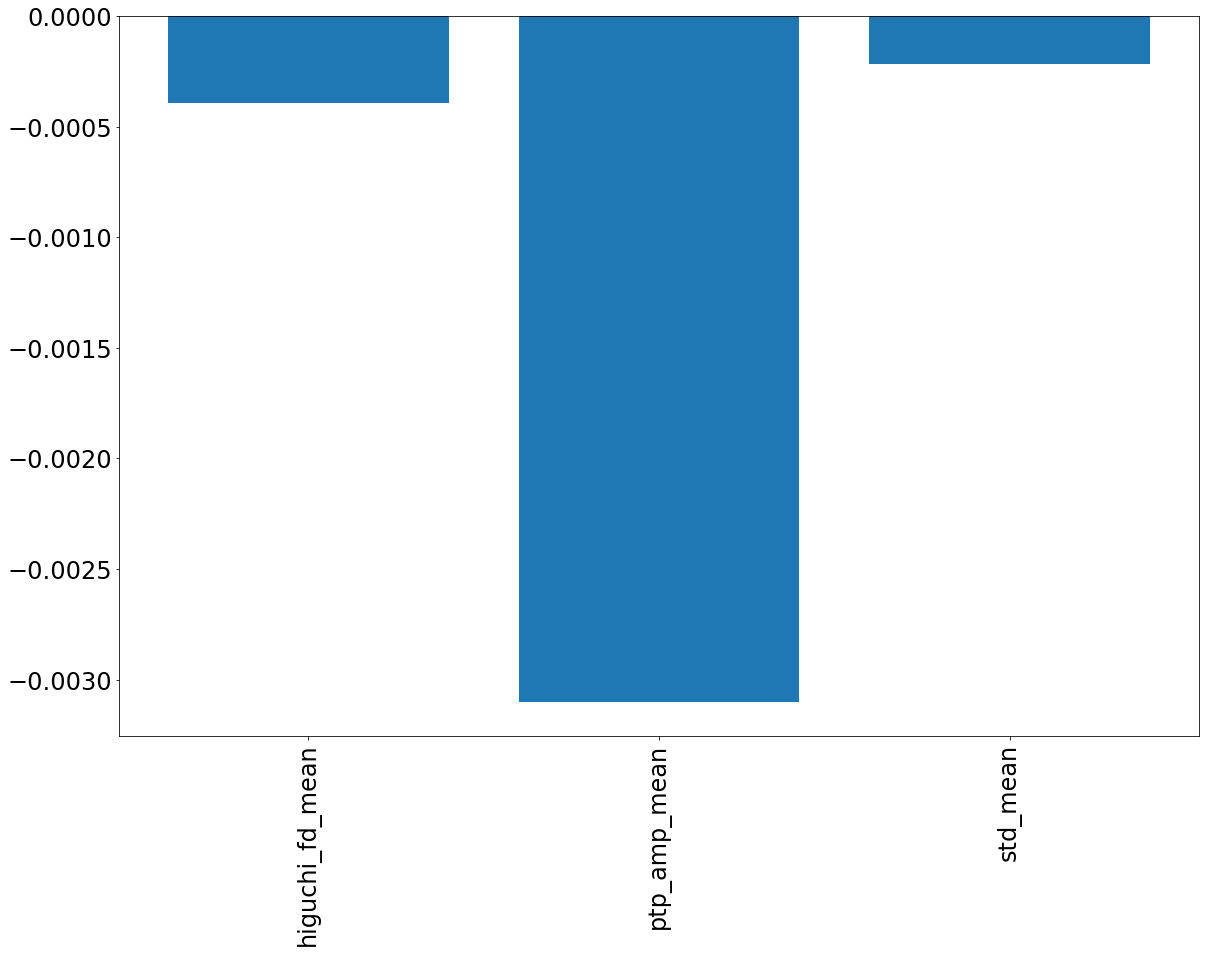

In [ ]:
# get importance
importance = pipe.coef_[0]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])
langs = ['higuchi_fd(column1)', 'higuchi_fd(column2)', 'higuchi_fd(column3)', 'higuchi_fd(column4)', 'higuchi_fd(column5)','higuchi_fd(column6)','higuchi_fd(column7)',
        'ptp_amp(column1)', 'ptp_amp(column2)', 'ptp_amp(column3)', 'ptp_amp(column4)', 'ptp_amp(column5)','ptp_amp(column6)','ptp_amp(column7)',
         'std(column1)', 'std(column2)', 'std(column3)', 'std(column4)', 'std(column5)','std(column6)','std(column7)']

ax.bar(langs,importance)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)

plt.show()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0,0,1,1])
higuchimean,ptp_ampmean,stdmean=meancalc(importance)
langs = ['higuchi_fd_mean', 'ptp_amp_mean', 'std_mean']
means = [higuchimean,ptp_ampmean,stdmean]
ax.bar(langs,means)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from mne.time_frequency import psd_welch

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

pipe = RandomForestClassifier(max_depth=2, random_state=0)

y_train = epochs_total_train.events[:, 2]
X_shuffled,y_shuffled = shuffle(epochs_total_train.get_data(), y_train, random_state=42)
pipe.fit(extract_feature_for_model(X_shuffled), y_shuffled)

y_pred_train = pipe.predict(extract_feature_for_model(X_shuffled))
y_pred_test = pipe.predict(extract_feature_for_model(epochs_total_test.get_data()))
y_test = epochs_total_test.events[:, 2]


acc_train = accuracy_score(y_shuffled,y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy score: {}\n".format(acc_train))
print("Test Accuracy score: {}\n".format(acc_test))


print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test, target_names=event_id.keys()))

Training Accuracy score: 0.664652940451239

Test Accuracy score: 0.6638711841663871

[[   0    0  170    0    0]
 [   0    0  153    0    0]
 [   0    0 1969    0    0]
 [   0    0  167   10    0]
 [   0    0  512    0    0]]
                 precision    recall  f1-score   support

  Sleep stage W       0.00      0.00      0.00       170
  Sleep stage 1       0.00      0.00      0.00       153
  Sleep stage 2       0.66      1.00      0.80      1969
Sleep stage 3/4       1.00      0.06      0.11       177
  Sleep stage R       0.00      0.00      0.00       512

       accuracy                           0.66      2981
      macro avg       0.33      0.21      0.18      2981
   weighted avg       0.50      0.66      0.53      2981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


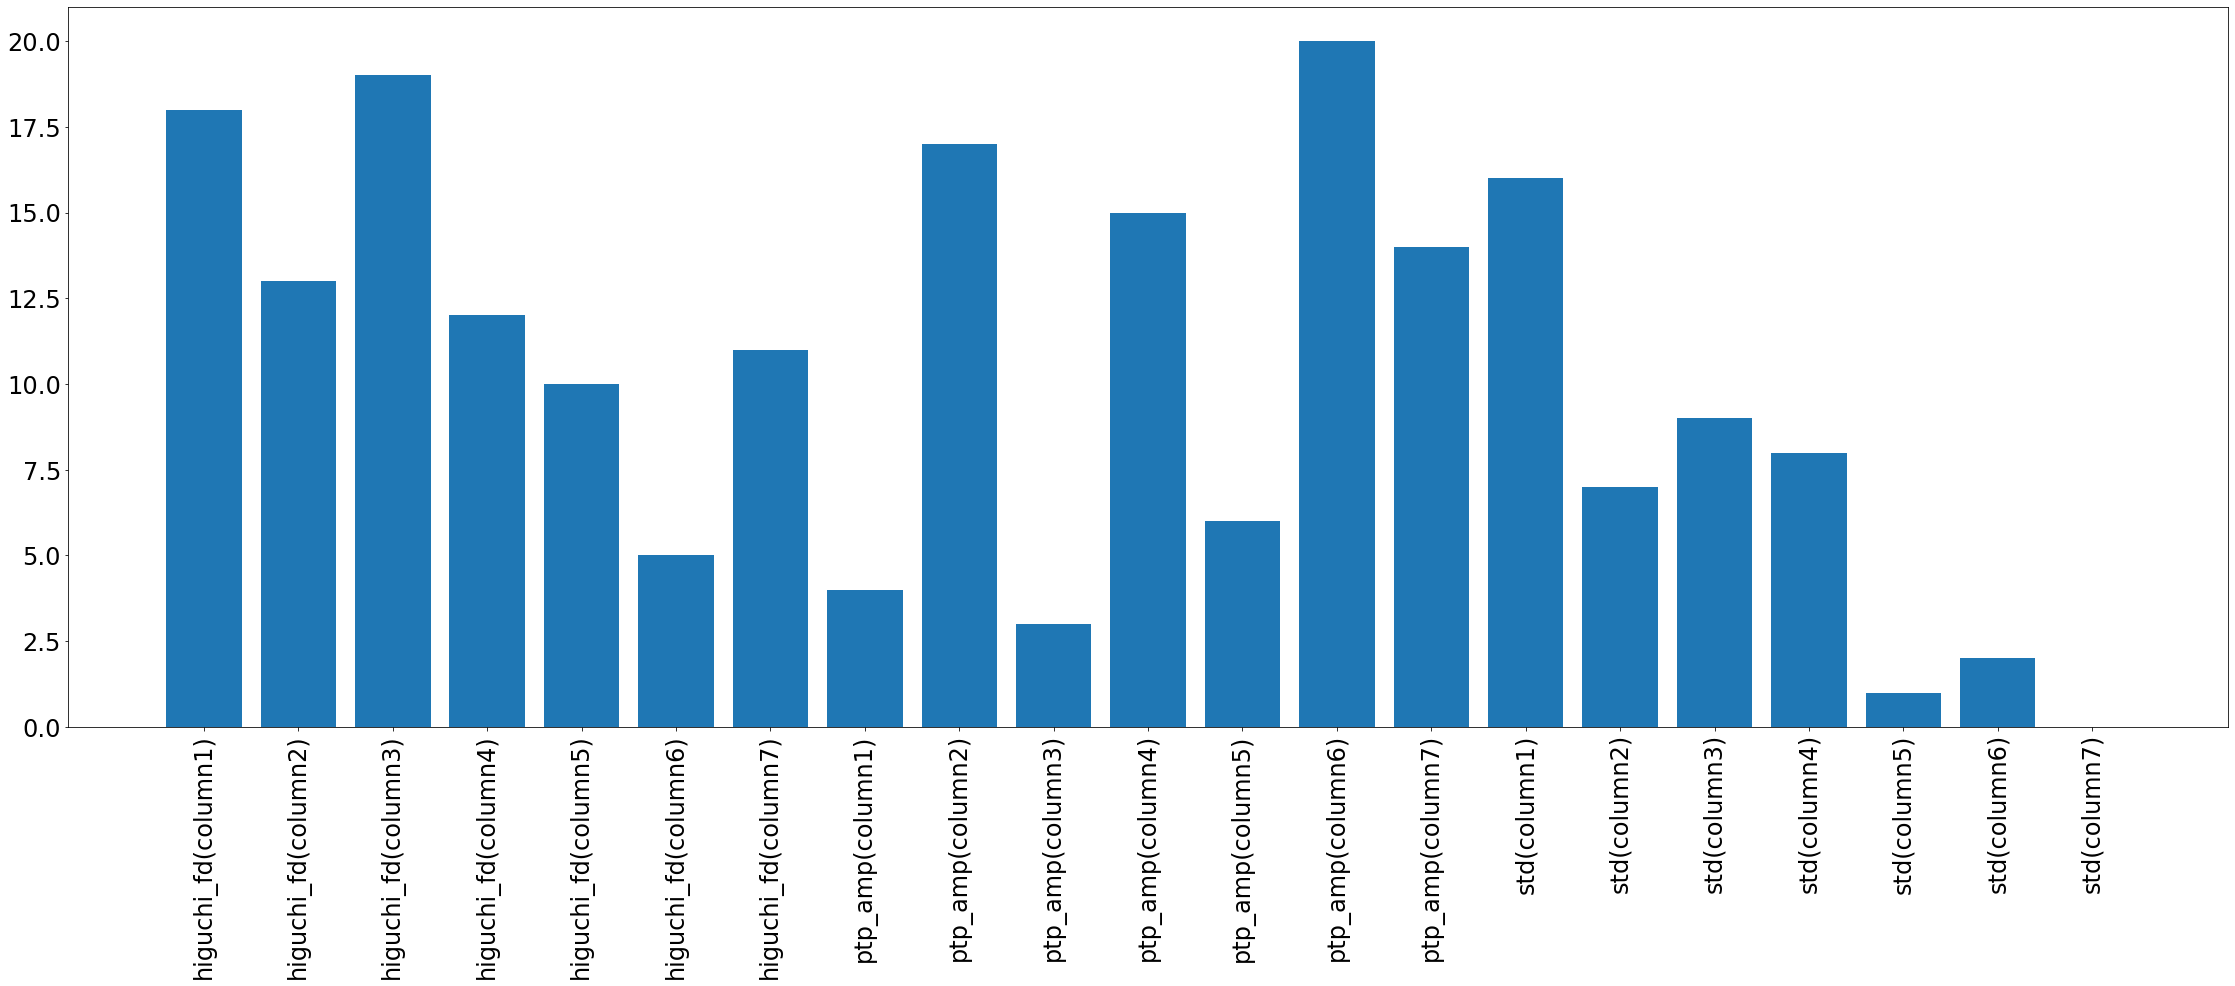

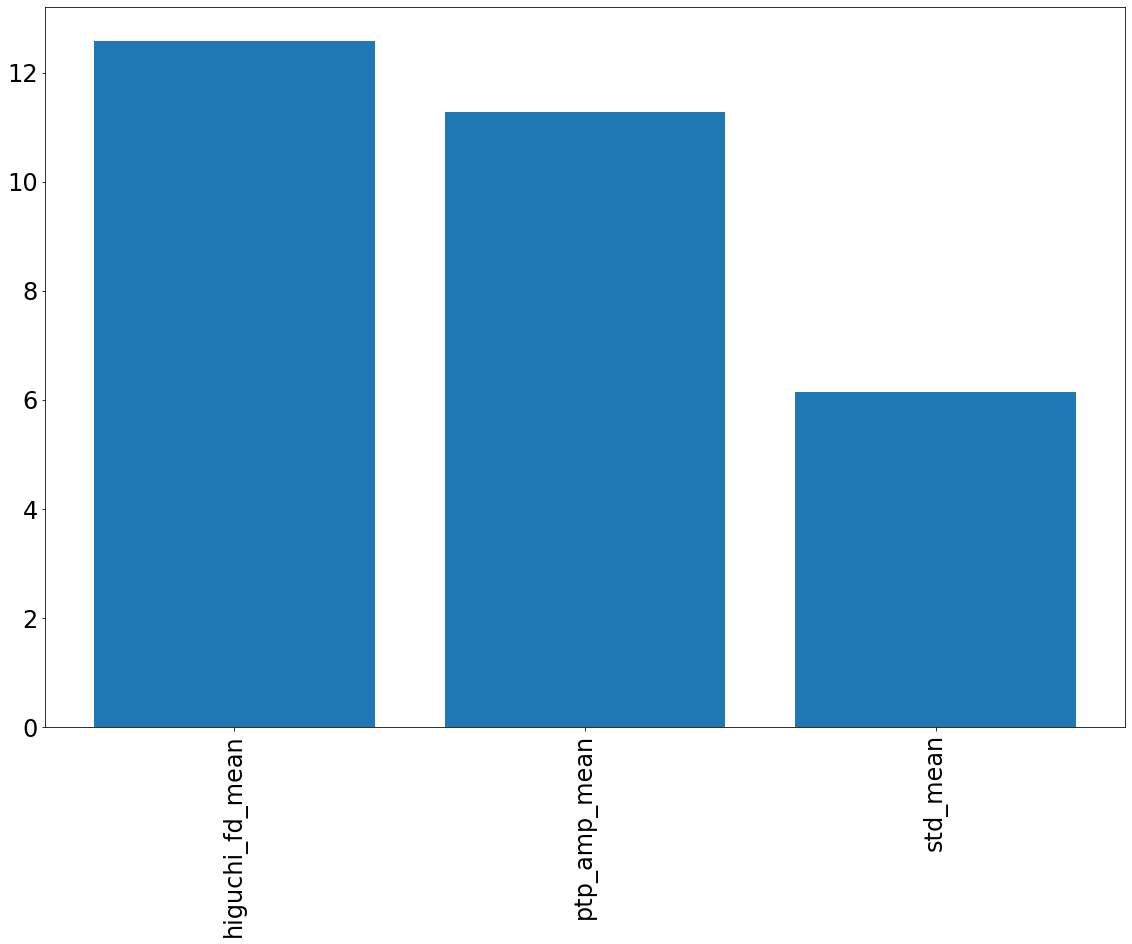

In [ ]:
sort = pipe.feature_importances_.argsort()

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])
langs = ['higuchi_fd(column1)', 'higuchi_fd(column2)', 'higuchi_fd(column3)', 'higuchi_fd(column4)', 'higuchi_fd(column5)','higuchi_fd(column6)','higuchi_fd(column7)',
        'ptp_amp(column1)', 'ptp_amp(column2)', 'ptp_amp(column3)', 'ptp_amp(column4)', 'ptp_amp(column5)','ptp_amp(column6)','ptp_amp(column7)',
         'std(column1)', 'std(column2)', 'std(column3)', 'std(column4)', 'std(column5)','std(column6)','std(column7)']

ax.bar(langs,sort[0:21])
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.show()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0,0,1,1])
higuchimean,ptp_ampmean,stdmean=meancalc(sort)
langs = ['higuchi_fd_mean', 'ptp_amp_mean', 'std_mean']
means = [higuchimean,ptp_ampmean,stdmean]
ax.bar(langs,means)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

pipe = DecisionTreeClassifier()

y_train = epochs_total_train.events[:, 2]
X_shuffled,y_shuffled = shuffle(epochs_total_train.get_data(), y_train, random_state=42)
pipe.fit(extract_feature_for_model(X_shuffled), y_shuffled)

y_pred_train = pipe.predict(extract_feature_for_model(X_shuffled))
y_pred_test = pipe.predict(extract_feature_for_model(epochs_total_test.get_data()))
y_test = epochs_total_test.events[:, 2]


acc_train = accuracy_score(y_shuffled,y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy score: {}\n".format(acc_train))
print("Test Accuracy score: {}\n".format(acc_test))


print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test, target_names=event_id.keys()))

Training Accuracy score: 1.0

Test Accuracy score: 0.5947668567594767

[[  32   33   76    0   29]
 [  17   31   62    0   43]
 [  43  131 1441   46  308]
 [   0    0   73  103    1]
 [  38   57  249    2  166]]
                 precision    recall  f1-score   support

  Sleep stage W       0.25      0.19      0.21       170
  Sleep stage 1       0.12      0.20      0.15       153
  Sleep stage 2       0.76      0.73      0.74      1969
Sleep stage 3/4       0.68      0.58      0.63       177
  Sleep stage R       0.30      0.32      0.31       512

       accuracy                           0.59      2981
      macro avg       0.42      0.41      0.41      2981
   weighted avg       0.61      0.59      0.60      2981



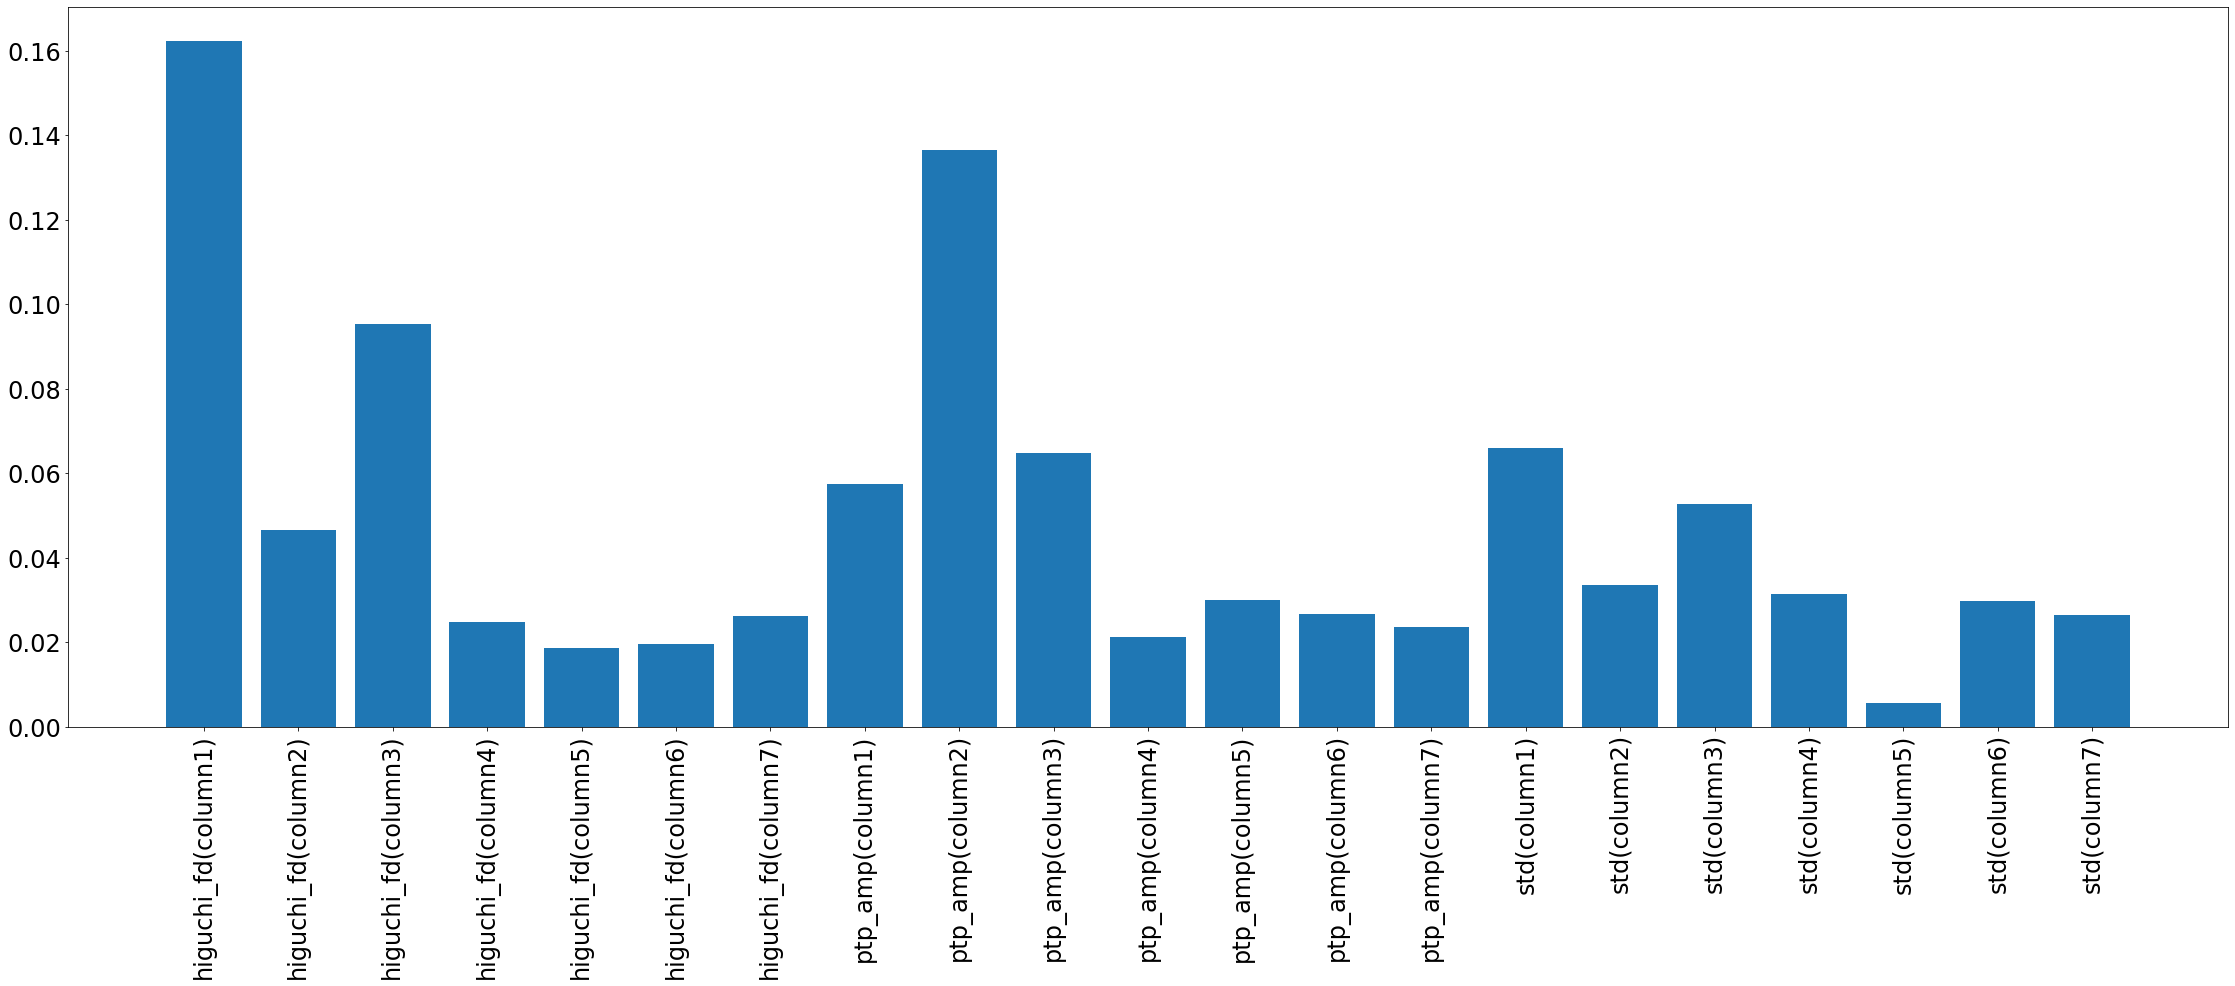

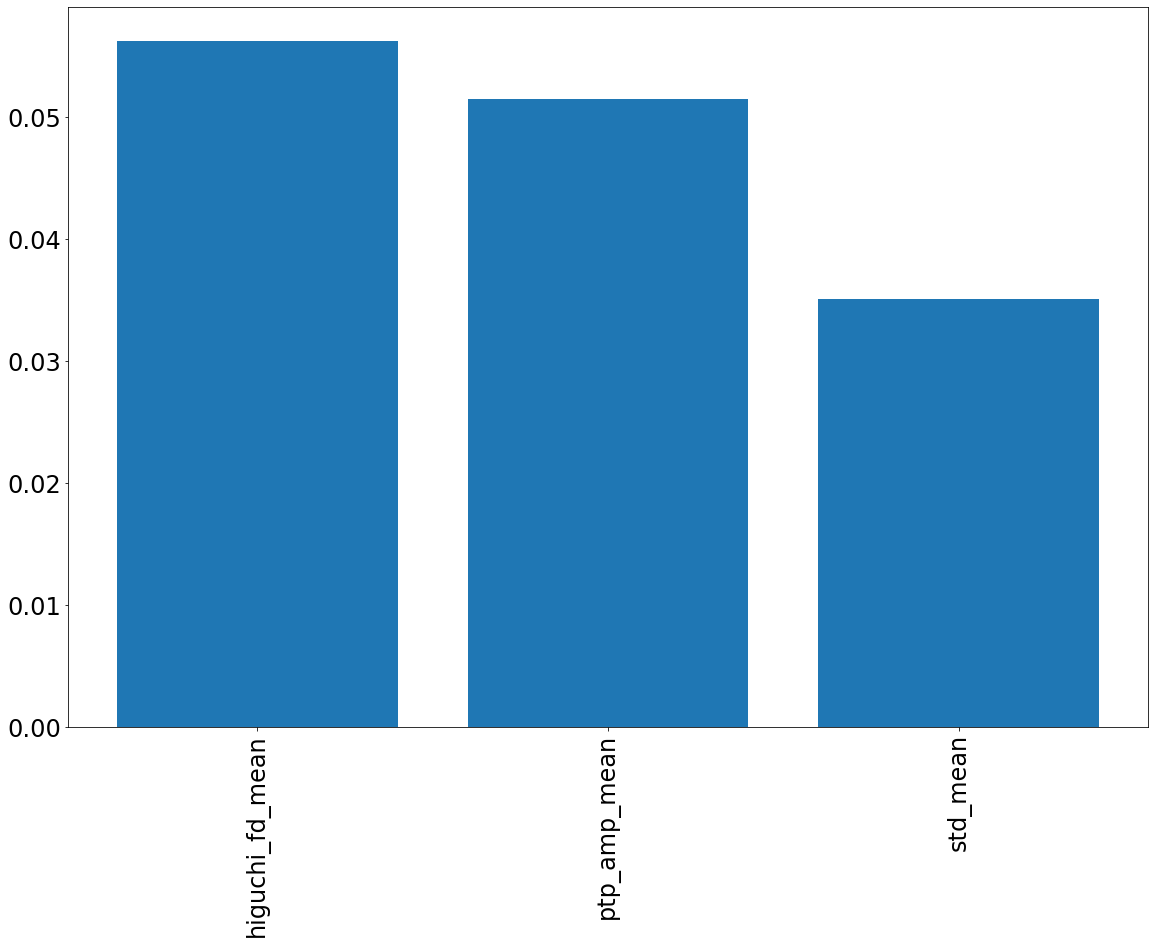

In [ ]:
# get importance
importance =pipe.feature_importances_

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])
langs = ['higuchi_fd(column1)', 'higuchi_fd(column2)', 'higuchi_fd(column3)', 'higuchi_fd(column4)', 'higuchi_fd(column5)','higuchi_fd(column6)','higuchi_fd(column7)',
        'ptp_amp(column1)', 'ptp_amp(column2)', 'ptp_amp(column3)', 'ptp_amp(column4)', 'ptp_amp(column5)','ptp_amp(column6)','ptp_amp(column7)',
         'std(column1)', 'std(column2)', 'std(column3)', 'std(column4)', 'std(column5)','std(column6)','std(column7)']

ax.bar(langs,importance)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)

plt.show()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0,0,1,1])
higuchimean,ptp_ampmean,stdmean=meancalc(importance)
langs = ['higuchi_fd_mean', 'ptp_amp_mean', 'std_mean']
means = [higuchimean,ptp_ampmean,stdmean]
ax.bar(langs,means)
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout
plt.show()